In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## Import all the data

In [2]:
#credit card-transaction for year 2014
cct_14 = pd.read_csv('Purchasing Card Data 2014 v1.csv')
#credit card-transaction for year 2015
cct_15 = pd.read_csv('PCard Transactions 15-16.txt')
#credit card-transaction for year 2016
cct_16 = pd.read_csv('PCard 1617.csv')


In [3]:
all = [cct_14,cct_15,cct_16]
for cct in all:
    #displaying tail can help see a pattern sometimes
    display(cct.tail())
    print('-'*150)

Service Area             Account Description  \
4137      Adults and Communities                         Postage   
4138  Children's Family Services  Equipment and Materials Purcha   
4139  Children's Family Services  Equipment and Materials Purcha   
4140  Children's Family Services           Books-CDs-Audio-Video   
4141  Children's Family Services  Other Transfer Payments to Soc   

                 Creditor Transaction Date  JV Reference     JV Date JV Value  
4137    WWW.ROYALMAIL.COM       23/02/2015          5002  16/03/2015      124  
4138   WWW.SMYTHSTOYS.COM       20/02/2015          5188  16/03/2015    89.96  
4139  WWW.TTS-GROUPS.CO.U       06/02/2015          5207  16/03/2015   445.92  
4140     WWW.WILDGOOSE.AC       09/02/2015          5271  16/03/2015   407.44  
4141  www.1st4footballtic       06/02/2015          4895  16/03/2015      153

------------------------------------------------------------------------------------------------------------------------------------------------------


Service Area Account Description         Creditor  \
3860  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3861  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3862  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3863  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3864                         NaN                 NaN              NaN   

     Journal Date  Journal Reference       Total  
3860   17/11/2015             6042.0         3.5  
3861   20/01/2016             6751.0         4.5  
3862   21/03/2016             7535.0         4.5  
3863   31/03/2016             7639.0         4.5  
3864          NaN                NaN  381,012.77

------------------------------------------------------------------------------------------------------------------------------------------------------


Service Area    Account Description            Creditor Journal Date  \
4577  Streetscene  Vehicle Running Costs     WWW.DVLA.GOV.UK   23/08/2016   
4578  Streetscene  Vehicle Running Costs     WWW.DVLA.GOV.UK   23/08/2016   
4579  Streetscene  Vehicle Running Costs     WWW.DVLA.GOV.UK   25/08/2016   
4580  Streetscene  Vehicle Running Costs  WWW.MOT-TESTING-CP   25/11/2016   
4581  Grand Total                    NaN                 NaN          NaN   

      Journal Reference       Total  
4577             9212.0      232.50  
4578             9213.0      167.50  
4579             9248.0      232.50  
4580            10384.0       68.00  
4581                NaN  471,044.01

------------------------------------------------------------------------------------------------------------------------------------------------------


FIN.TRANSACTION DATE FIN.POSTING DATE FIN.TRANSACTION AMOUNT  \
4926             16/03/18         19/03/18                  20.00   
4927             07/03/18         08/03/18                 354.25   
4928             21/03/18         22/03/18                  51.88   
4929             22/03/18         26/03/18                  10.00   
4930             27/03/18         28/03/18                  11.00   

          MCH.MERCHANT NAME  MCH.CITY NAME FIN.ORIGINAL CURRENCY AMOUNT  \
4926               GIFFGAFF   WWW.GIFFGAFF                        20.00   
4927        LOVE2SHOP.CO.UK  0345 717 1111                       354.25   
4928  AMAZON UK MARKETPLACE   800-279-6620                        51.88   
4929        WWW.BRENTGOV.UK       INTERNET                        10.00   
4930      LUTON BC INTERNET          LUTON                        11.00   

     FIN.ORIGINAL ISO CURRENCY CODE SYMBOL  FIN.INET CONVERSION  
4926                                   GBP                  1.0  
4927                                   GBP                  1.0  
4928                                   GBP                  1.0  
4929                                   GBP                  1.0  
4930                                   GBP                  1.0

------------------------------------------------------------------------------------------------------------------------------------------------------


For the year 2015 and 2016, At the end of the records there is a total row which has the value for total transactions in the year. This row should be removed before doing any statistical annalysis so that we dont take it as a transaction record and create faulty measurements

In [4]:
for cct in all:
    print(cct.columns)
    print('-'*150)

Index(['Service Area', 'Account Description', 'Creditor', 'Transaction Date',
       'JV Reference', 'JV Date', 'JV Value'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------------------------------------
Index(['Service Area', 'Account Description', 'Creditor', 'Journal Date',
       'Journal Reference', 'Total'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------------------------------------
Index(['Service Area', 'Account Description', 'Creditor', 'Journal Date',
       'Journal Reference', 'Total'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------------------------------------
Index(['FIN.TRANSACTION DATE', 'FIN.POSTING DATE', 'FIN.TRANSACTION AMOUNT',
       'MCH.MERCHANT NAME', 'MCH.CITY NAME', 'FIN.ORIGI

In [5]:
for cct in all:
    print(cct.info())
    print('-'*150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Service Area         4142 non-null   object
 1   Account Description  4142 non-null   object
 2   Creditor             4142 non-null   object
 3   Transaction Date     4142 non-null   object
 4   JV Reference         4142 non-null   int64 
 5   JV Date              4142 non-null   object
 6   JV Value             4142 non-null   object
dtypes: int64(1), object(6)
memory usage: 226.6+ KB
None
------------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Service Area         3864 non-null

### From the surface exploration, following things are noticed:
- The year 2014 has an extra column when compared to the years before which doesn't hold any analytical value so can be dropped
- The column names are slightly modified throughout the years even though they refer to the same thing.
- The last year has a completely different format and has to be processed to add new columns like Service Area and Account Description

## Fixing the columns

In [6]:
#The first three years have the same columns and the year 2014 has JV Date which can be disregarded
cct_14.columns

Index(['Service Area', 'Account Description', 'Creditor', 'Transaction Date',
       'JV Reference', 'JV Date', 'JV Value'],
      dtype='object')

In [7]:
cct_14.drop(columns='JV Date',inplace=True)
cct_14.columns

Index(['Service Area', 'Account Description', 'Creditor', 'Transaction Date',
       'JV Reference', 'JV Value'],
      dtype='object')

In [8]:
##Assuming Journal Date and Transaction Date, TOtal and JV Value are synonymous, lets change the column names

In [9]:
#since they are ordered similarly
cct_14.columns = cct_15.columns

## Concatenation of the first three yearly records

We will combine the top three data and explore them first and find out a way to process the final year of data

In [10]:
#Lets concat all the years with similar layout first and then deal with the last one
cct_14_16 = pd.concat([cct_14,cct_15,cct_16],axis=0)

In [11]:
cct_14_16

Service Area             Account Description            Creditor  \
0     Childrens Services                     IT Services       123-REG.CO.UK   
1     Childrens Services                  Other Services  ACCESS EXPEDITIONS   
2     Childrens Services  Equipment and Materials Repair     AFE SERVICELINE   
3     Childrens Services  Equipment and Materials Repair     AFE SERVICELINE   
4     Childrens Services  Building Repairs & Maintenance    ALLSOP & FRANCIS   
...                  ...                             ...                 ...   
4577         Streetscene           Vehicle Running Costs     WWW.DVLA.GOV.UK   
4578         Streetscene           Vehicle Running Costs     WWW.DVLA.GOV.UK   
4579         Streetscene           Vehicle Running Costs     WWW.DVLA.GOV.UK   
4580         Streetscene           Vehicle Running Costs  WWW.MOT-TESTING-CP   
4581         Grand Total                             NaN                 NaN   

     Journal Date  Journal Reference       Total  
0      23/04/2014               93.0      143.81  
1      03/04/2014              111.0    6,000.00  
2      02/04/2014                6.0      309.38  
3      02/04/2014                7.0      218.76  
4      15/04/2014              381.0         306  
...           ...                ...         ...  
4577   23/08/2016             9212.0      232.50  
4578   23/08/2016             9213.0      167.50  
4579   25/08/2016             9248.0      232.50  
4580   25/11/2016            10384.0       68.00  
4581          NaN                NaN  471,044.01  

[12589 rows x 6 columns]

We have more than 12.5k records for the first three years.

In [12]:
cct_14_16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12589 entries, 0 to 4581
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Service Area         12588 non-null  object 
 1   Account Description  12587 non-null  object 
 2   Creditor             12587 non-null  object 
 3   Journal Date         12587 non-null  object 
 4   Journal Reference    12587 non-null  float64
 5   Total                12589 non-null  object 
dtypes: float64(1), object(5)
memory usage: 688.5+ KB


### We can see that some of the columns' datatype needs to be changed. The journal date must be a datetime value whereas the total must be a float values as well.

In [13]:
len(set(cct_17['MCH.MERCHANT NAME'])-set(cct_14_16['Creditor']))

540

In [14]:
'ZARA BRENT CROSS' in cct_14_16.Creditor

False

## Fixing the datatypes

In [15]:
cct_14_16['Journal Date'] = pd.to_datetime(cct_14_16['Journal Date'], dayfirst = True )

For the total column there are commas in the number which needs to be removed to convert them into float

In [16]:
cct_14_16['Total'] = cct_14_16['Total'].apply(lambda x: x.replace(',',''))

In [17]:
cct_14_16['Total'].head()

0     143.81
1    6000.00
2     309.38
3     218.76
4        306
Name: Total, dtype: object

In [18]:
cct_14_16['Total'] = pd.to_numeric(cct_14_16['Total'])

In [19]:
cct_14_16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12589 entries, 0 to 4581
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         12588 non-null  object        
 1   Account Description  12587 non-null  object        
 2   Creditor             12587 non-null  object        
 3   Journal Date         12587 non-null  datetime64[ns]
 4   Journal Reference    12587 non-null  float64       
 5   Total                12589 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 688.5+ KB


## Dealing with null values and duplicates

In [20]:
cct_14_16.isnull().sum()

Service Area           1
Account Description    2
Creditor               2
Journal Date           2
Journal Reference      2
Total                  0
dtype: int64

There seem to be two rows with null values which were identified before as the total transactions for 2 years. They must be dropped.

In [21]:
cct_14_16[cct_14_16.isnull().any(axis=1)]

Service Area Account Description Creditor Journal Date  \
3864          NaN                 NaN      NaN          NaT   
4581  Grand Total                 NaN      NaN          NaT   

      Journal Reference      Total  
3864                NaN  381012.77  
4581                NaN  471044.01

In [22]:
cct_14_16.dropna(inplace=True)

In [23]:
cct_14_16.isnull().sum()

Service Area           0
Account Description    0
Creditor               0
Journal Date           0
Journal Reference      0
Total                  0
dtype: int64

In [24]:
cct_14_16.duplicated().sum()

0

There are not any duplicate records for a transaction 

## Exploration

In [25]:
cct_14_16.describe()

Journal Date  Journal Reference         Total
count                          12587       12587.000000  12587.000000
mean   2015-10-11 11:15:05.791689728        6126.846906     99.823445
min              2014-04-02 00:00:00           1.000000  -4707.000000
25%              2014-12-18 00:00:00        3943.500000     10.000000
50%              2015-10-23 00:00:00        5795.000000     26.830000
75%              2016-07-22 00:00:00        8847.500000     92.045000
max              2017-04-03 00:00:00       12136.000000  15340.800000
std                              NaN        3248.967457    391.385966

In this data, we have 12587 records from 2015/10/11 to 2017/04/03 and the transactions ranges between -5707(Credits or refunds) to 15340.

In [47]:
# Checking negative transactions 
cct_14_16[cct_14_16['Total']<0]

Service Area             Account Description  \
22    Childrens Services                      Food Costs   
119   Childrens Services          Miscellaneous Expenses   
164   Childrens Services                      Food Costs   
269   Childrens Services                      Food Costs   
282   Childrens Services                      Food Costs   
...                  ...                             ...   
4425        Street Scene  Equipment and Materials Purcha   
4444        Street Scene  Equipment and Materials Purcha   
4449        Street Scene  Equipment and Materials Purcha   
4465        Street Scene  Equipment and Materials Purcha   
4474        Street Scene    Operating Leases - Transport   

                    Creditor Journal Date  Journal Reference   Total  
22        ASDA HOME DELIVERY   2014-04-15               50.0   -6.90  
119      GRO HM PASSPORT OFF   2014-04-16              279.0  -23.40  
164        JS ONLINE GROCERY   2014-04-23              262.0   -1.95  
269         TESCO STORE 3539   2014-04-29              385.0   -4.00  
282         TESCO STORES 644   2014-04-02               70.0 -230.30  
...                      ...          ...                ...     ...  
4425        AMZ COM2SAVE LTD   2017-03-20            11807.0  -37.57  
4444         SCREWFIX DIRECT   2017-02-06            11301.0  -15.16  
4449  SELCO NEW SOUTHGATE EF   2017-02-21            11499.0  -30.96  
4465     WWW.TOOLSTATION.COM   2016-07-06             8609.0 -583.12  
4474  LONDON BOROUGH OF HARR   2017-02-24            11559.0  -65.00  

[413 rows x 6 columns]

In [48]:
cct_14_16[cct_14_16['Total']<0]['Service Area'].value_counts()

Service Area
Children's Family Services       290
Family Services                   34
Childrens Services                25
Commissioning                     21
Children's Education & Skills     15
Street Scene                      10
Customer Support Group             5
Children's Service DSG             5
Assurance                          3
Adults and Communities             2
Public Health                      1
CSG Managed Budget                 1
Commercial                         1
Name: count, dtype: int64

In [26]:
for col in cct_14_16.columns:
    if cct_14_16[col].dtype == 'object':
        print(f'No of unique values in {col}:', cct_14_16[col].nunique() )

No of unique values in Service Area: 24
No of unique values in Account Description: 67
No of unique values in Creditor: 1936


### Lets explore them individually

In [27]:
def get_uniques(df):
    for col in df.columns:
        if cct_14_16[col].dtype == 'object':
            print(f'Distribution of transaction according to {col}')
            print(cct_14_16[col].value_counts())
            print('-'*150)
get_uniques(cct_14_16)

Distribution of transaction according to Service Area
Service Area
Children's Family Services        7672
Childrens Services                1297
Family Services                    770
Children's Education & Skills      667
Streetscene                        420
Commissioning                      400
Assurance                          344
Adults and Communities             278
Children's Service DSG             277
Customer Support Group             117
Deputy Chief Operating Officer     113
Education                           95
Street Scene                        39
CSG Managed Budget                  36
Parking & Infrastructure            12
Internal Audit & CAFT               11
Commercial                           9
Control Accounts                     8
Governance                           8
Regional Enterprise                  6
NSCSO                                3
Public Health                        3
Strategic Commissioning Board        1
HRA                                 

In the service area, Street Scene is differently labelled at different records, so let's fix that.

In [33]:
#Replacing the value in Service Area where it is StreetScene to Street Scene
cct_14_16['Service Area'] = cct_14_16['Service Area'].replace('Streetscene','Street Scene')

In [34]:
cct_14_16['Service Area'].value_counts()

Service Area
Children's Family Services        7672
Childrens Services                1297
Family Services                    770
Children's Education & Skills      667
Street Scene                       459
Commissioning                      400
Assurance                          344
Adults and Communities             278
Children's Service DSG             277
Customer Support Group             117
Deputy Chief Operating Officer     113
Education                           95
CSG Managed Budget                  36
Parking & Infrastructure            12
Internal Audit & CAFT               11
Commercial                           9
Governance                           8
Control Accounts                     8
Regional Enterprise                  6
NSCSO                                3
Public Health                        3
Strategic Commissioning Board        1
HRA                                  1
Name: count, dtype: int64

In [49]:
## Categorizing numerical and categorical columns
cat_col = [col for col in cct_14_16.columns if cct_14_16[col].dtype == 'object']
num_col = [col for col in cct_14_16.columns if cct_14_16[col].dtype != 'object']


In [90]:
def plot_top_10_dist():
    for col in cat_col:
        # Sorting the data by the total transaction amount
        sorted_data = cct_14_16.groupby(col)['Total'].sum().reset_index().sort_values(by='Total', ascending=False)
    
        top_10 = sorted_data.head(10)
        ax = sns.barplot(data=top_10, y=col, x='Total', palette='crest')
        ax.set_ylabel(col)
        ax.set_xlabel('Total Transaction Amount')
        ax.set_title(f'Top 10 {col} Transaction Amounts')
        ax.bar_label(ax.containers[0], fontsize=8)
        #for adding margin getting the min and max 
        xmin, xmax = ax.get_xlim()
        ax.set_xlim(xmin,xmax*1.2)
        plt.show()


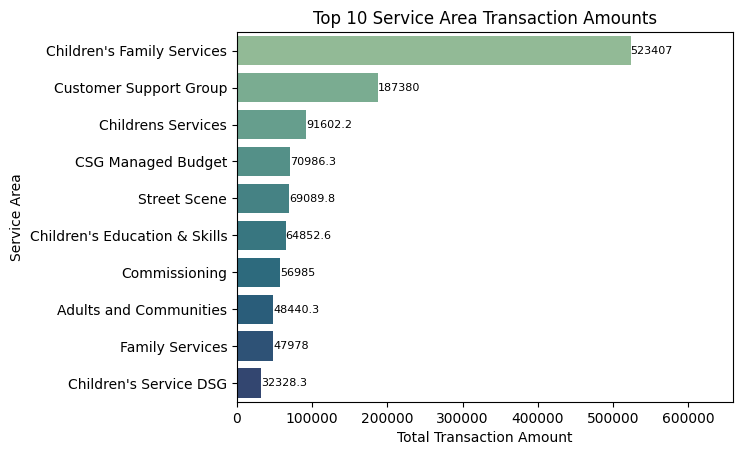

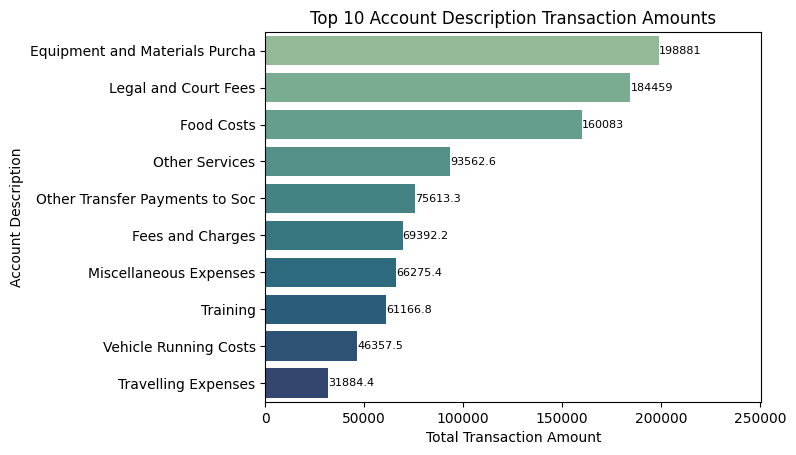

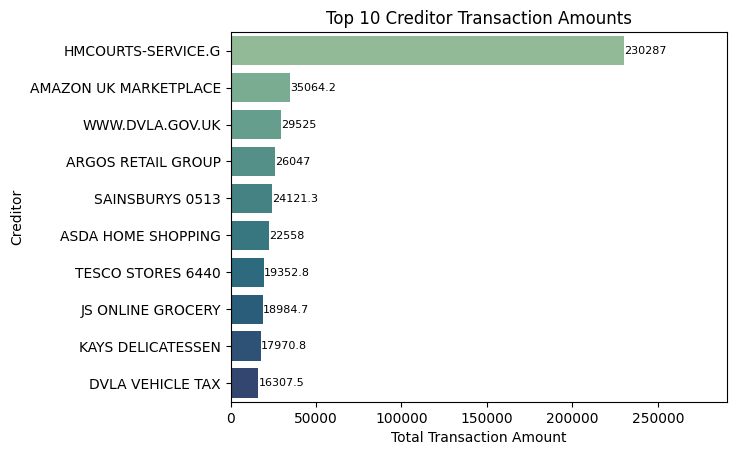

In [91]:
plot_top_10_dist()

Lets see the spendings over the years

In [118]:
def plot_total_vs_months():
    # Plotting Total transactions monthly using a line plot
    # Extracting months from 'Journal Date'
    cct_14_16['Month'] = cct_14_16['Journal Date'].dt.to_period('M').astype(str)
    
    # Group by month and calculate the sum of 'Total'
    monthly_totals = cct_14_16.groupby('Month')['Total'].sum().reset_index()
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_totals, x='Month', y='Total', marker='o')
    plt.title('Total Trasactions per month')
    plt.xlabel('Journal Date')
    plt.ylabel('Total')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

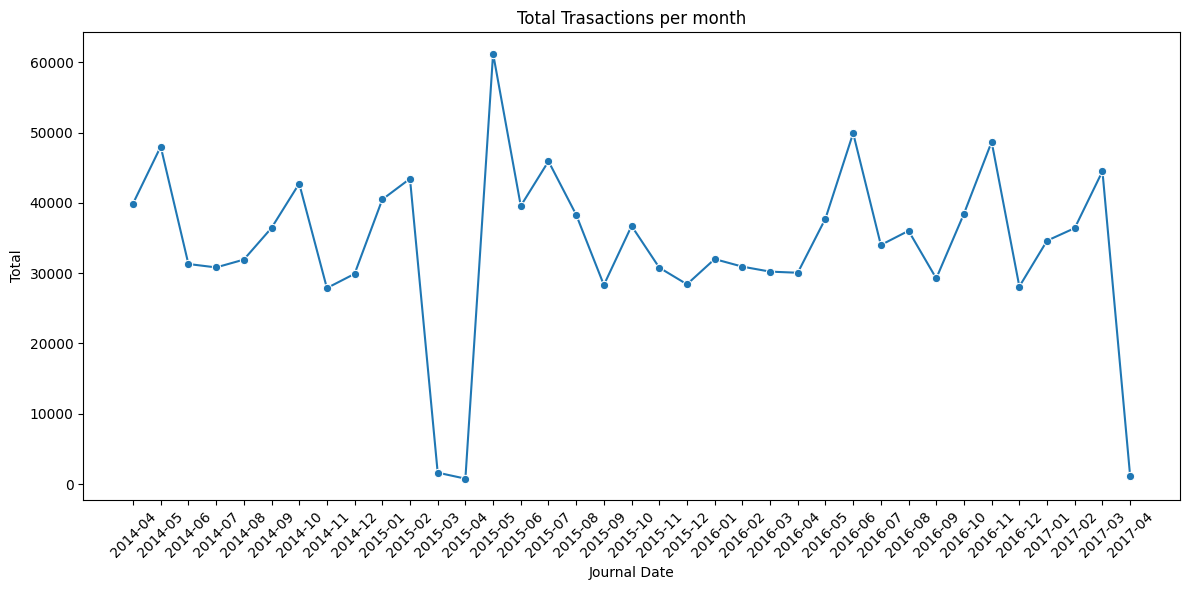

In [259]:
plot_total_vs_months()

It seems April normally the lowest sum of transactions whereas May spikes in transactions

## Quaterly summary of Transactions per Service Area

In [122]:
#Lets extract the quarters from the date
cct_14_16['Quarters'] = cct_14_16['Journal Date'].dt.year.astype(str) + '-Q' + cct_14_16['Journal Date'].dt.quarter.astype(str)

In [123]:
cct_14_16

Service Area             Account Description            Creditor  \
0     Childrens Services                     IT Services       123-REG.CO.UK   
1     Childrens Services                  Other Services  ACCESS EXPEDITIONS   
2     Childrens Services  Equipment and Materials Repair     AFE SERVICELINE   
3     Childrens Services  Equipment and Materials Repair     AFE SERVICELINE   
4     Childrens Services  Building Repairs & Maintenance    ALLSOP & FRANCIS   
...                  ...                             ...                 ...   
4576        Street Scene           Vehicle Running Costs     WWW.DVLA.GOV.UK   
4577        Street Scene           Vehicle Running Costs     WWW.DVLA.GOV.UK   
4578        Street Scene           Vehicle Running Costs     WWW.DVLA.GOV.UK   
4579        Street Scene           Vehicle Running Costs     WWW.DVLA.GOV.UK   
4580        Street Scene           Vehicle Running Costs  WWW.MOT-TESTING-CP   

     Journal Date  Journal Reference    Total    Month Quarters  
0      2014-04-23               93.0   143.81  2014-04  2014-Q2  
1      2014-04-03              111.0  6000.00  2014-04  2014-Q2  
2      2014-04-02                6.0   309.38  2014-04  2014-Q2  
3      2014-04-02                7.0   218.76  2014-04  2014-Q2  
4      2014-04-15              381.0   306.00  2014-04  2014-Q2  
...           ...                ...      ...      ...      ...  
4576   2016-08-23             9211.0   232.50  2016-08  2016-Q3  
4577   2016-08-23             9212.0   232.50  2016-08  2016-Q3  
4578   2016-08-23             9213.0   167.50  2016-08  2016-Q3  
4579   2016-08-25             9248.0   232.50  2016-08  2016-Q3  
4580   2016-11-25            10384.0    68.00  2016-11  2016-Q4  

[12587 rows x 8 columns]

In [254]:
# Group by Service Area and Quarter_Str and count transactions
transactions_by_quarter = cct_14_16.groupby(['Quarters','Service Area'])['Total'].count().unstack(fill_value = 0)
transactions_by_quarter

Service Area  Adults and Communities  Assurance  CSG Managed Budget  \
Quarters                                                              
2014-Q2                           16          0                  20   
2014-Q3                            8          0                  12   
2014-Q4                           18          3                   4   
2015-Q1                           11          4                   0   
2015-Q2                            8         52                   0   
2015-Q3                           15         39                   0   
2015-Q4                           19         30                   0   
2016-Q1                           23         29                   0   
2016-Q2                           25         60                   0   
2016-Q3                           37         36                   0   
2016-Q4                           45         53                   0   
2017-Q1                           52         38                   0   
2017-Q2                            1          0                   0   

Service Area  Children's Education & Skills  Children's Family Services  \
Quarters                                                                  
2014-Q2                                   0                           0   
2014-Q3                                   0                           0   
2014-Q4                                  72                         597   
2015-Q1                                 165                         607   
2015-Q2                                 160                         590   
2015-Q3                                  96                         750   
2015-Q4                                  86                         815   
2016-Q1                                  55                         867   
2016-Q2                                  10                         758   
2016-Q3                                  15                         804   
2016-Q4                                   6                         896   
2017-Q1                                   2                         980   
2017-Q2                                   0                           8   

Service Area  Children's Service DSG  Childrens Services  Commercial  \
Quarters                                                               
2014-Q2                            0                 946           0   
2014-Q3                           31                 331           9   
2014-Q4                           32                  20           0   
2015-Q1                           15                   0           0   
2015-Q2                           12                   0           0   
2015-Q3                           20                   0           0   
2015-Q4                           59                   0           0   
2016-Q1                           31                   0           0   
2016-Q2                           24                   0           0   
2016-Q3                           19                   0           0   
2016-Q4                           24                   0           0   
2017-Q1                           10                   0           0   
2017-Q2                            0                   0           0   

Service Area  Commissioning  Control Accounts  ...  Family Services  \
Quarters                                       ...                    
2014-Q2                   0                 8  ...                0   
2014-Q3                   0                 0  ...              460   
2014-Q4                  44                 0  ...              310   
2015-Q1                  29                 0  ...                0   
2015-Q2                  11                 0  ...                0   
2015-Q3                  18                 0  ...                0   
2015-Q4                  40                 0  ...                0   
2016-Q1                  62                 0  ...                0   
2016-Q2          

In [255]:
transactions_by_quarter.columns

Index(['Adults and Communities', 'Assurance', 'CSG Managed Budget',
       'Children's Education & Skills', 'Children's Family Services',
       'Children's Service DSG', 'Childrens Services', 'Commercial',
       'Commissioning', 'Control Accounts', 'Customer Support Group',
       'Deputy Chief Operating Officer', 'Education', 'Family Services',
       'Governance', 'HRA', 'Internal Audit & CAFT', 'NSCSO',
       'Parking & Infrastructure', 'Public Health', 'Regional Enterprise',
       'Strategic Commissioning Board', 'Street Scene'],
      dtype='object', name='Service Area')

In [584]:
def compare_sa_txn():

    #using input function for better usability
    
    ## asking for user input on desired aggregation function
    aggr = ''

    # handling invalid input
    while aggr not in ('count','mean','sum'):
        aggr = input('''How would you like to compare the transactions?
    - count
    - mean
    - sum
    ''')
        
    # asking for desired plot
    to_plot = ''
    while to_plot.lower() != 'line' and to_plot.lower() != 'bar' : 
        to_plot = input('Line or Bar Graph??')
        
    # asking if they want stacked charts
    stacked = True if input('Do you want them stacked? y/n')=='y' else False


    transactions_by_quarter = cct_14_16.groupby(['Quarters','Service Area'])['Total'].agg(aggr).unstack(fill_value = 0)
   
    if stacked:
    
        #stacked charts might be hard to read, so setting limits
        n_stack = int(input('How many top areas do you want to compare?'))
        
        # Calculate the sum of each column
        sum_col = transactions_by_quarter.sum()
        
        # Sort the columns based on their sums
        sorted_col = sum_col.sort_values(ascending=False)
        
        # Select the top 10 columns
        top_cols = sorted_col.head(n_stack)
        if to_plot == 'line':
            sns.lineplot(transactions_by_quarter[top_cols.index], marker = 'o',palette='crest')
        else:
            ax = transactions_by_quarter[top_cols.index].plot(kind='bar', stacked=False, figsize = (12,6))

        #annotations and styling
        plt.title(f'Transactions by Quarter for Top {n_stack} Areas')
        plt.xlabel('Quarter')
        plt.ylabel(f'Transaction {aggr}')
        plt.legend(title='Service Area', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
        plt.show()
    else:
        for col in transactions_by_quarter.columns:
            plt.figure(figsize = (12,6))
            if to_plot == 'line':
                plt.plot(transactions_by_quarter[col].index,transactions_by_quarter[col].values, 'go:', label = f'TRANSACTION {aggr.upper()}')
                for x,y in zip(transactions_by_quarter[col].index, transactions_by_quarter[col].values):
                    label = '{:.2f}'.format(y)
                    plt.annotate(label,(x,y))
            else:
                ax = sns.barplot(x = transactions_by_quarter[col].index, y = transactions_by_quarter[col].values, palette='crest')
                ax.bar_label(ax.containers[0], fontsize=8)
            plt.title(f'Transactions by Quarter for {col}') 
            plt.xlabel('Quarter')
            plt.ylabel(f'Transaction {aggr}')
            plt.xticks(rotation=45)
            plt.show()

How would you like to compare the transactions?
    - count
    - mean
    - sum
     mean
Line or Bar Graph?? line
Do you want them stacked? y/n n


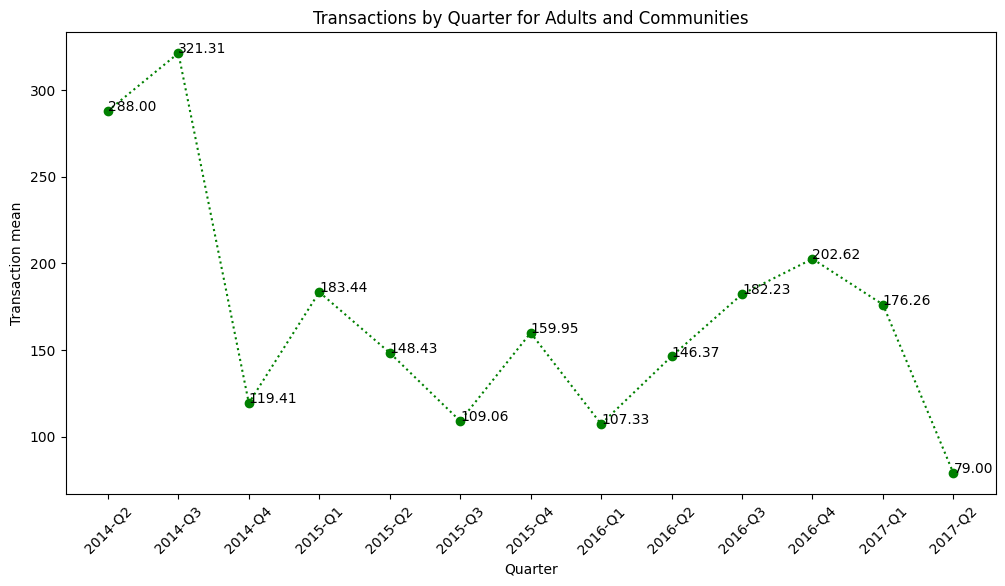

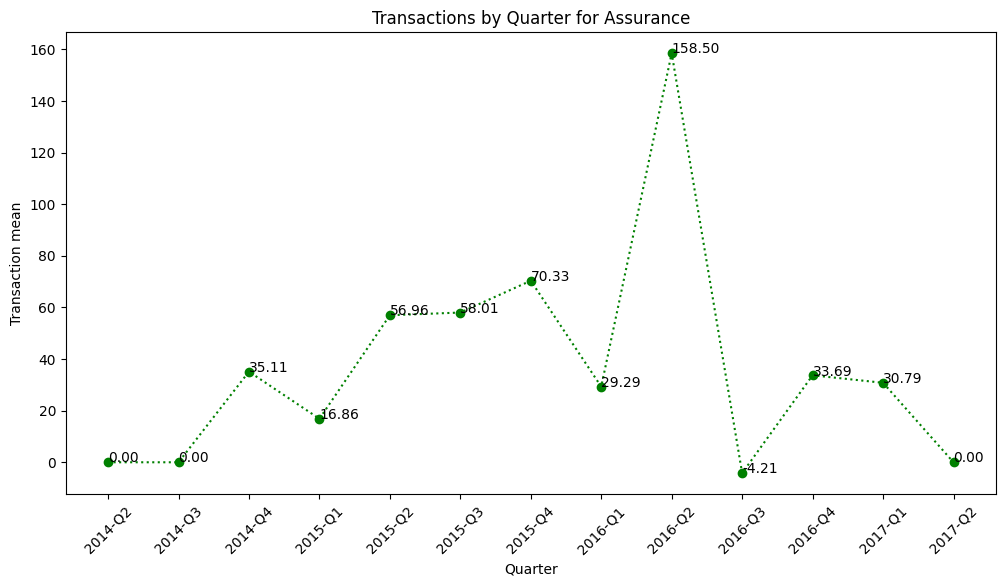

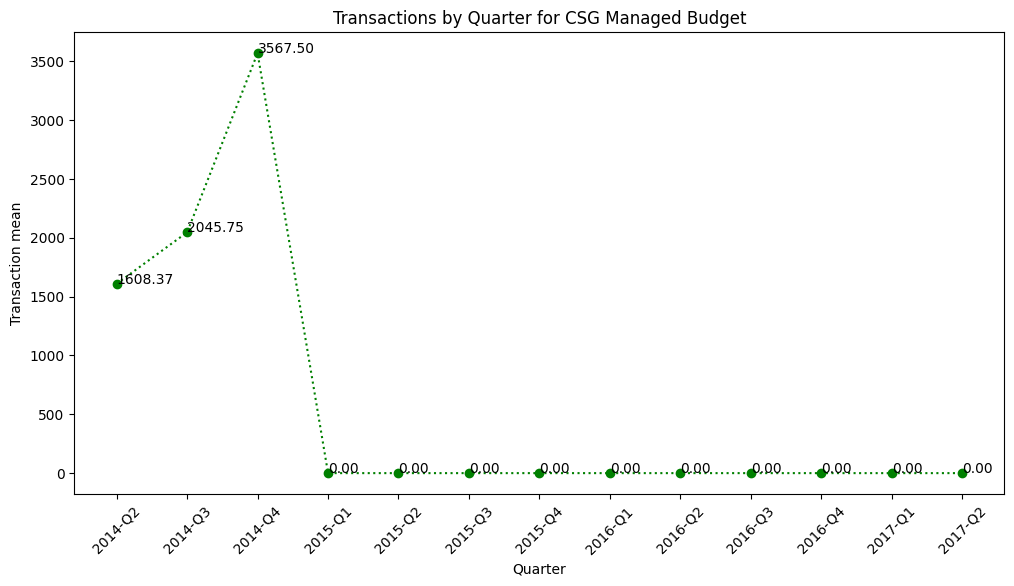

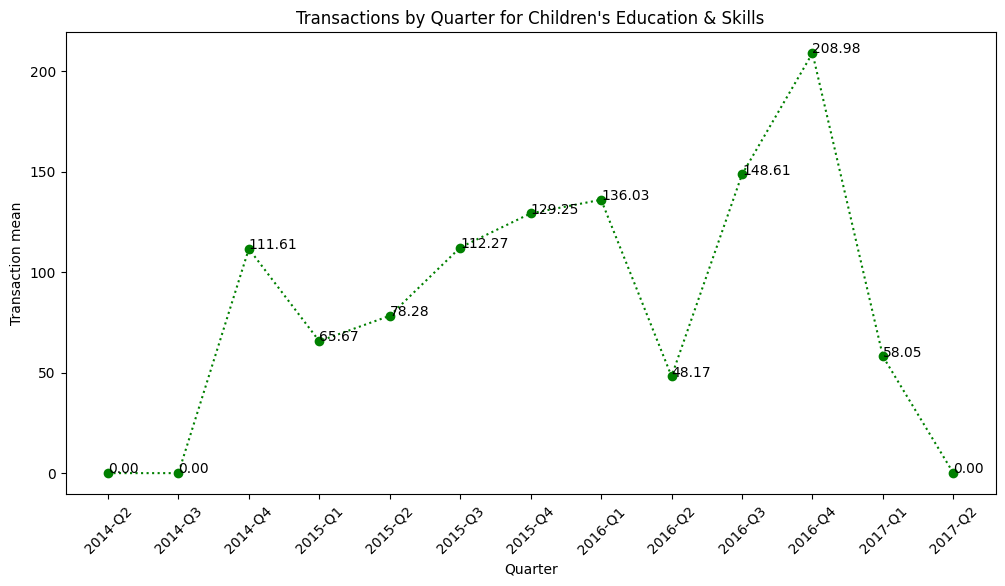

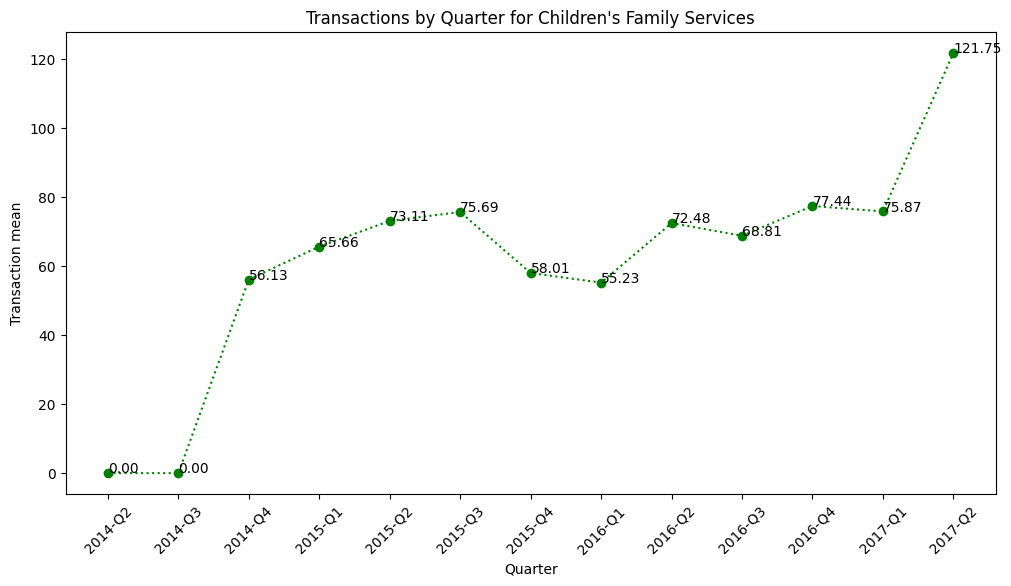

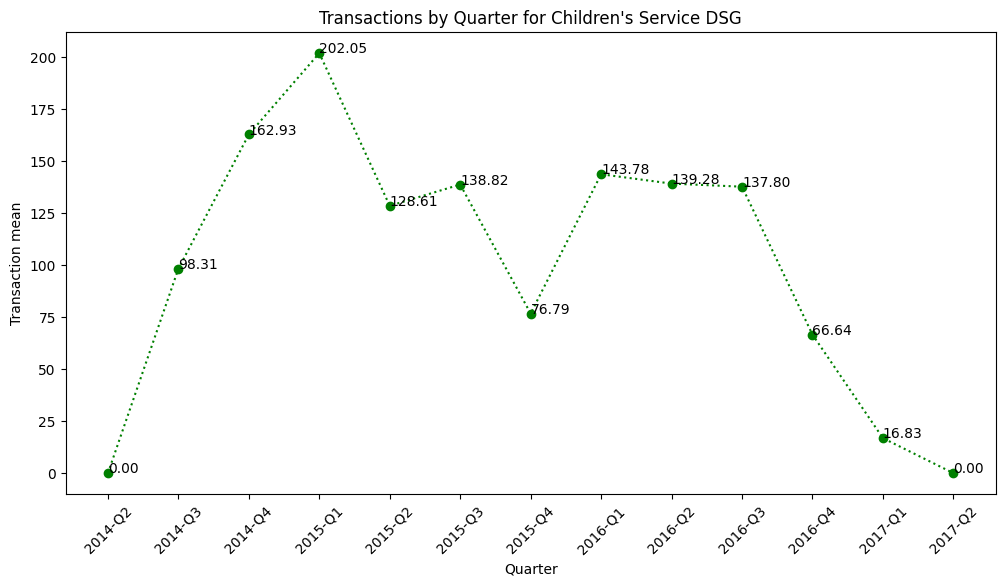

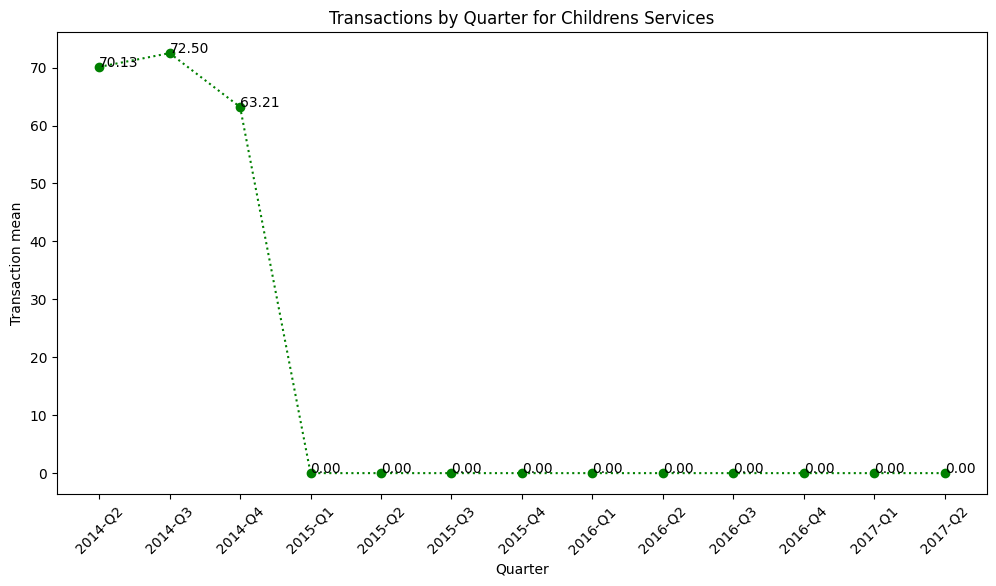

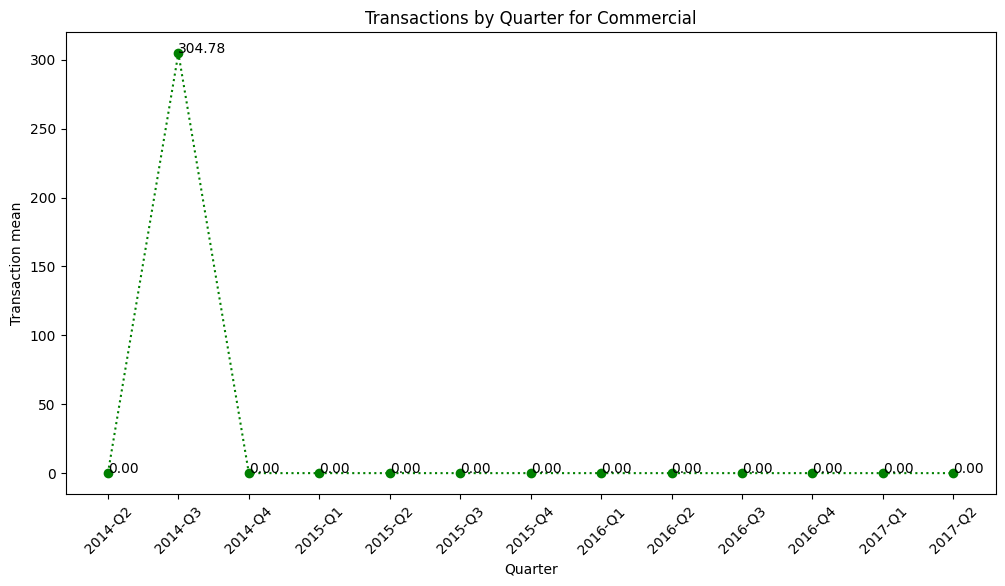

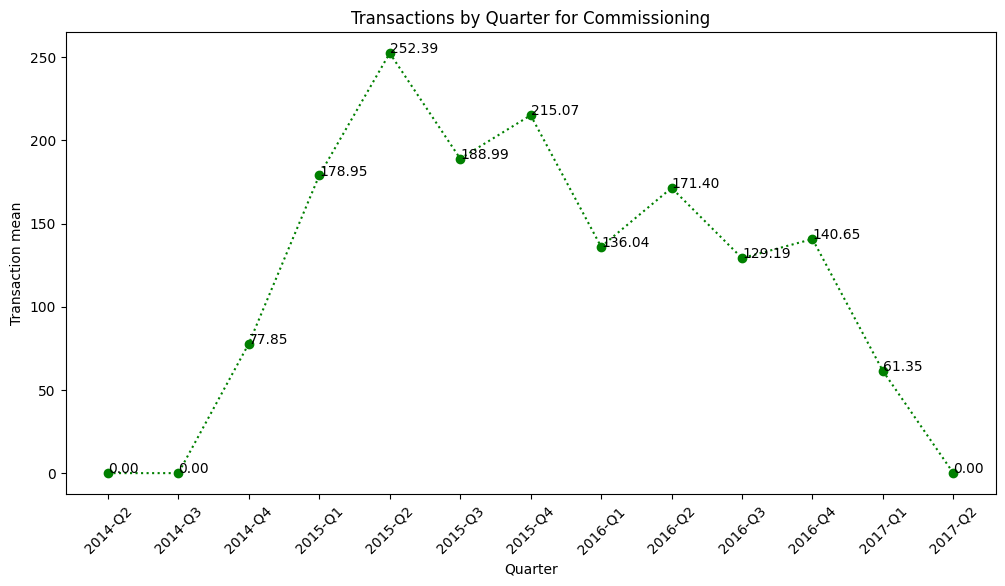

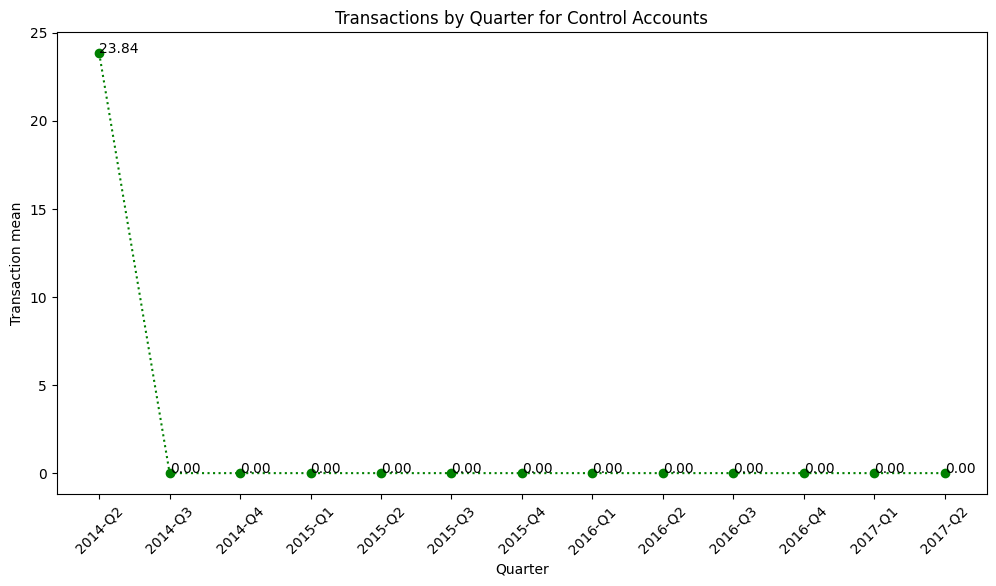

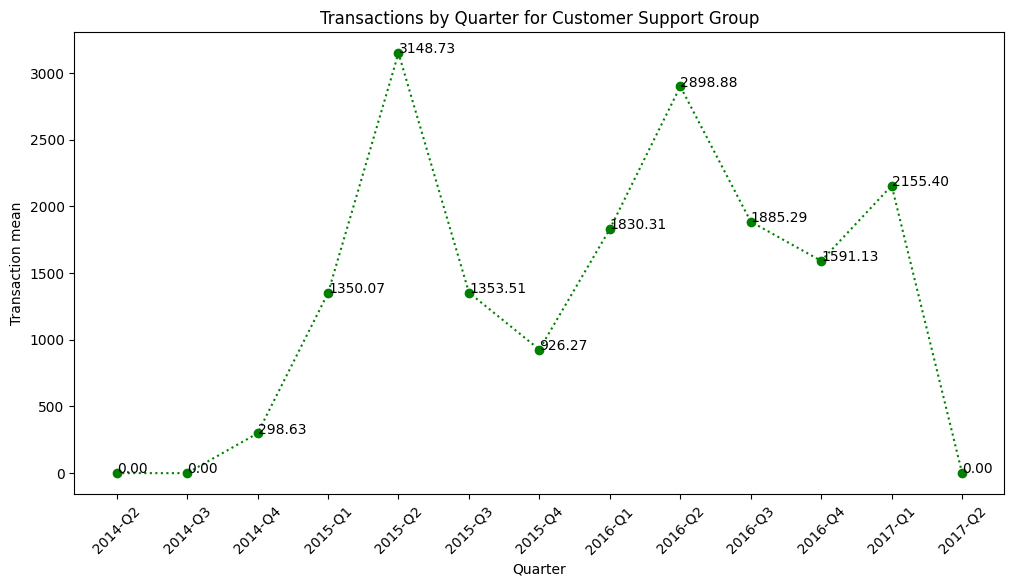

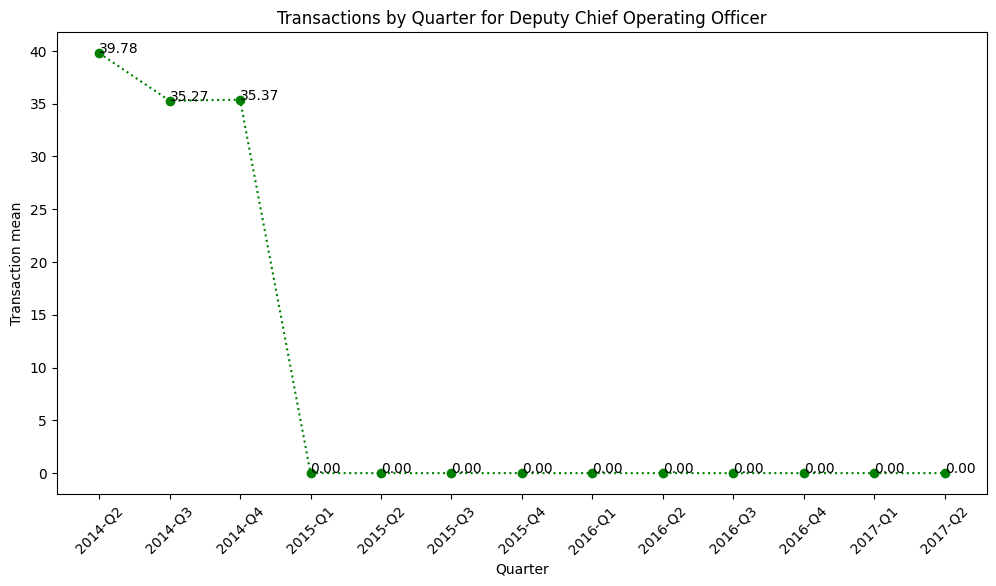

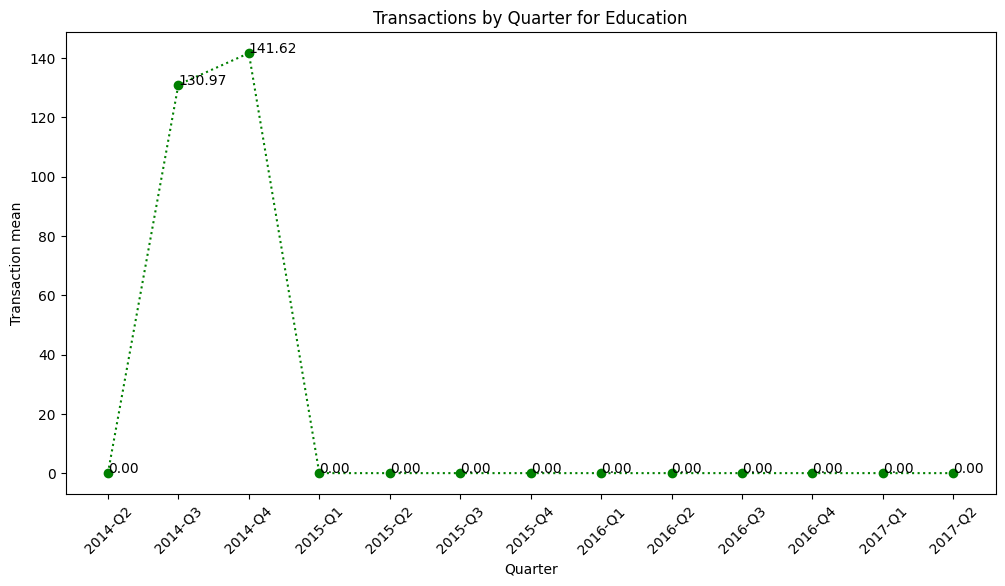

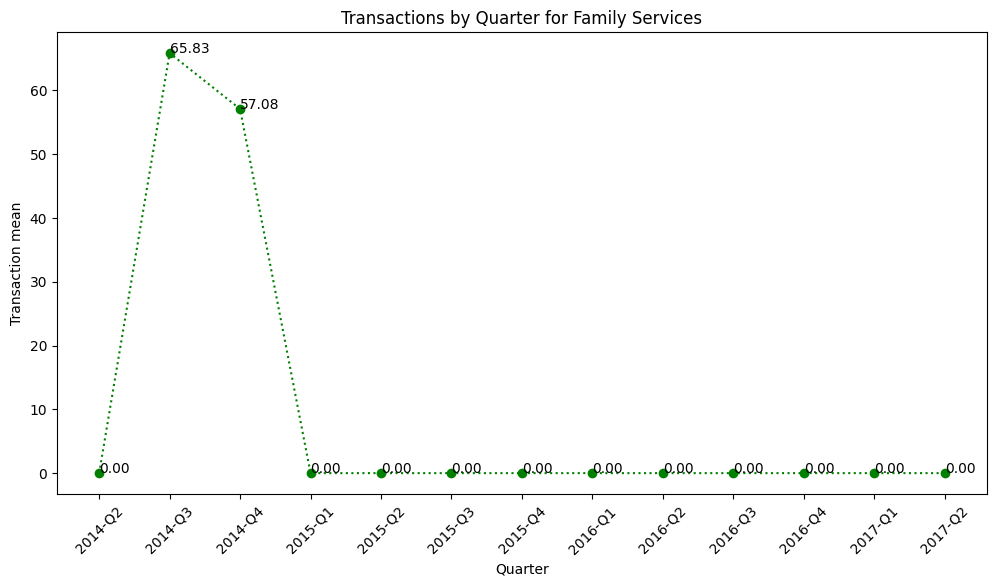

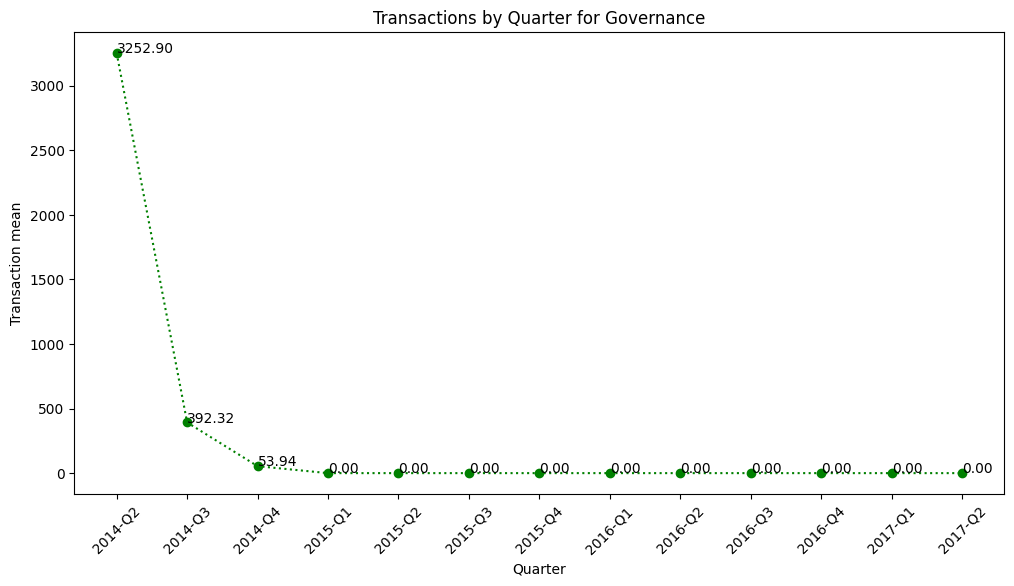

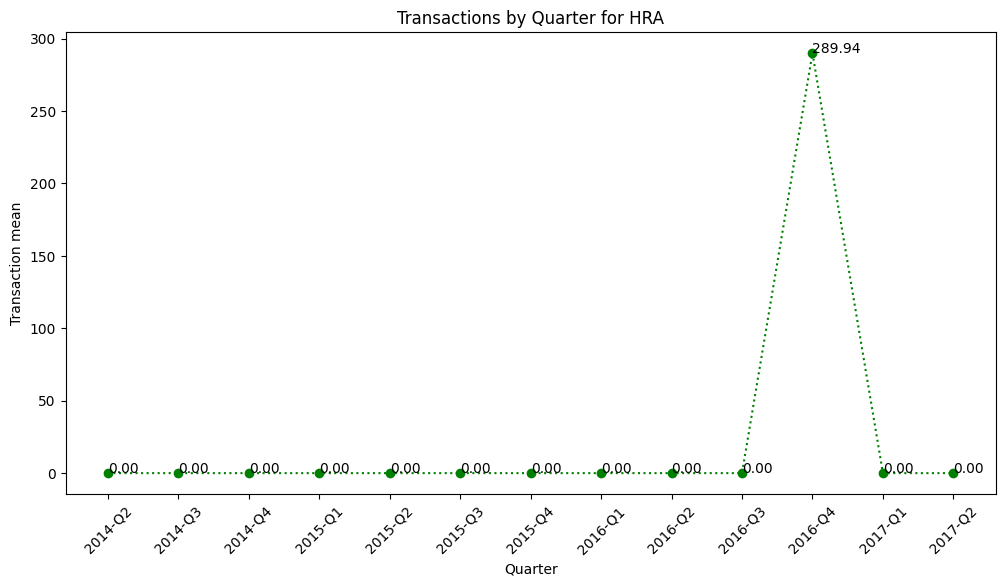

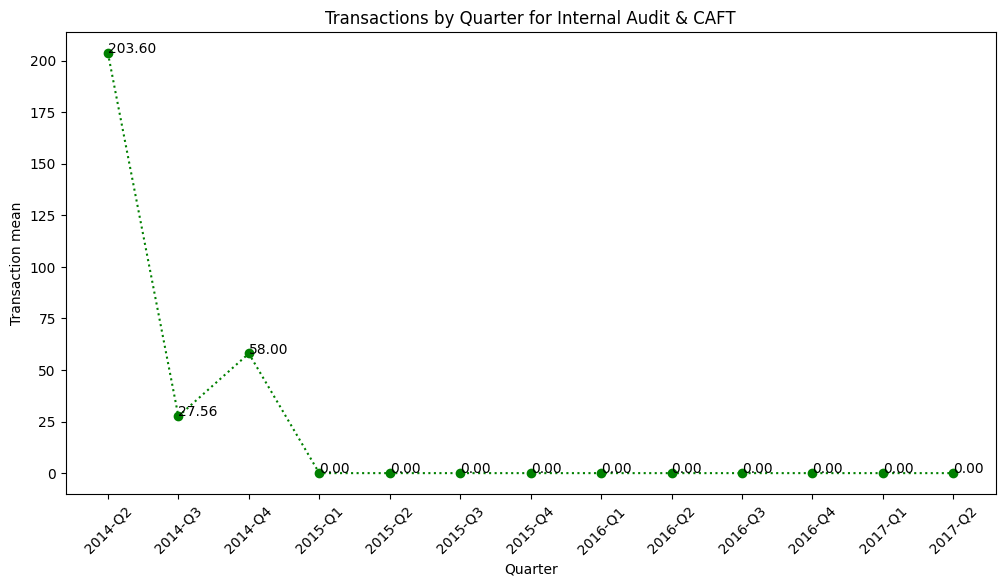

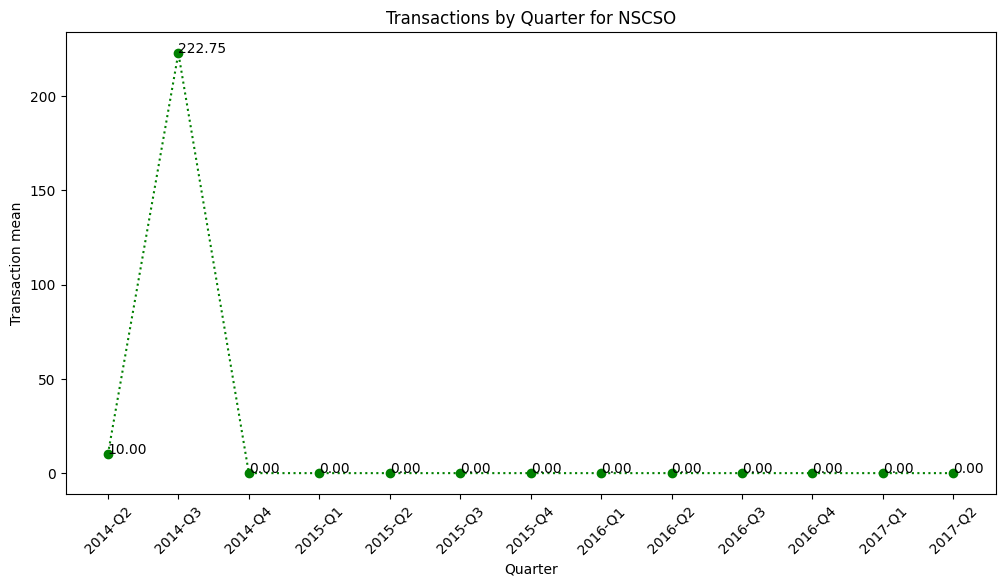

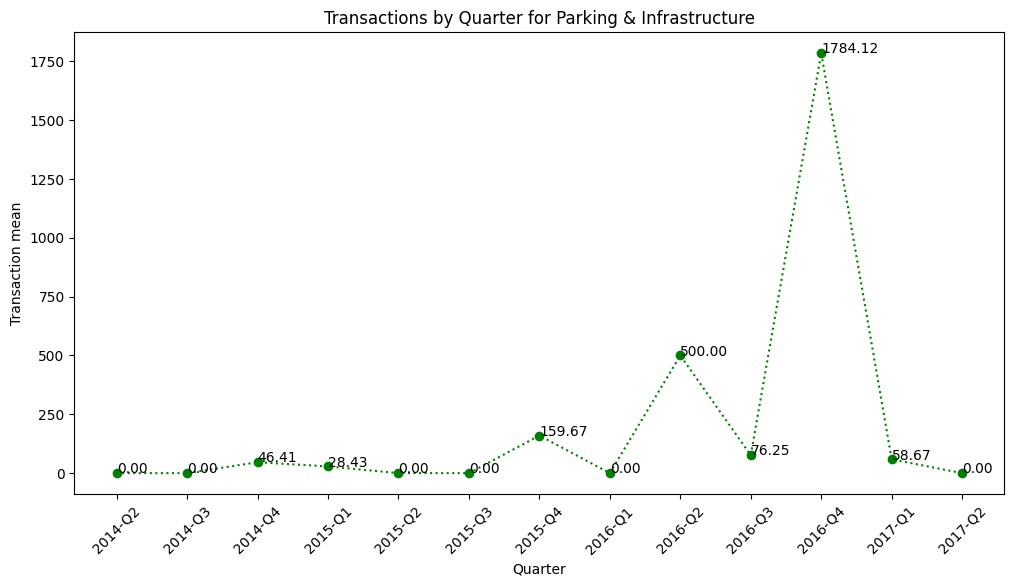

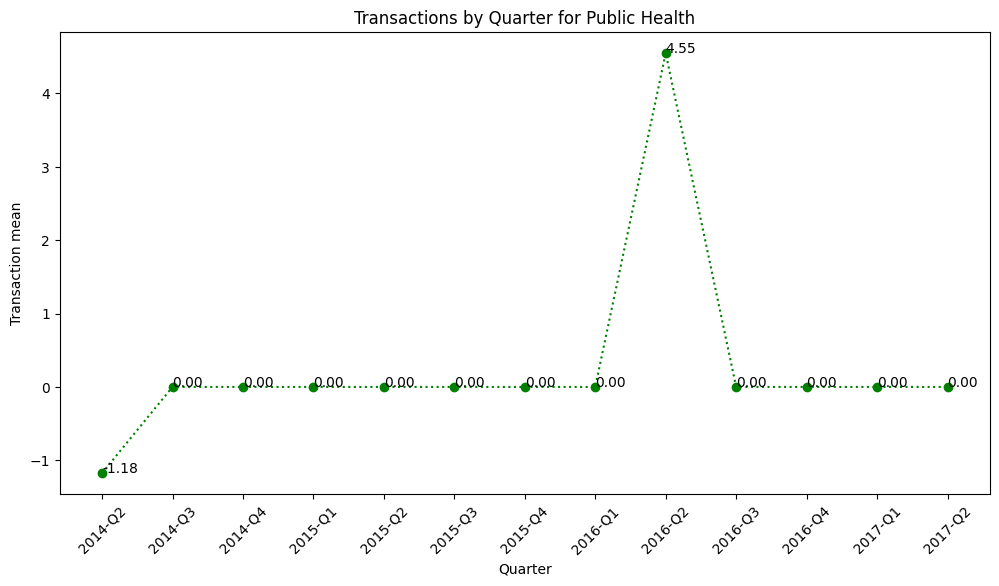

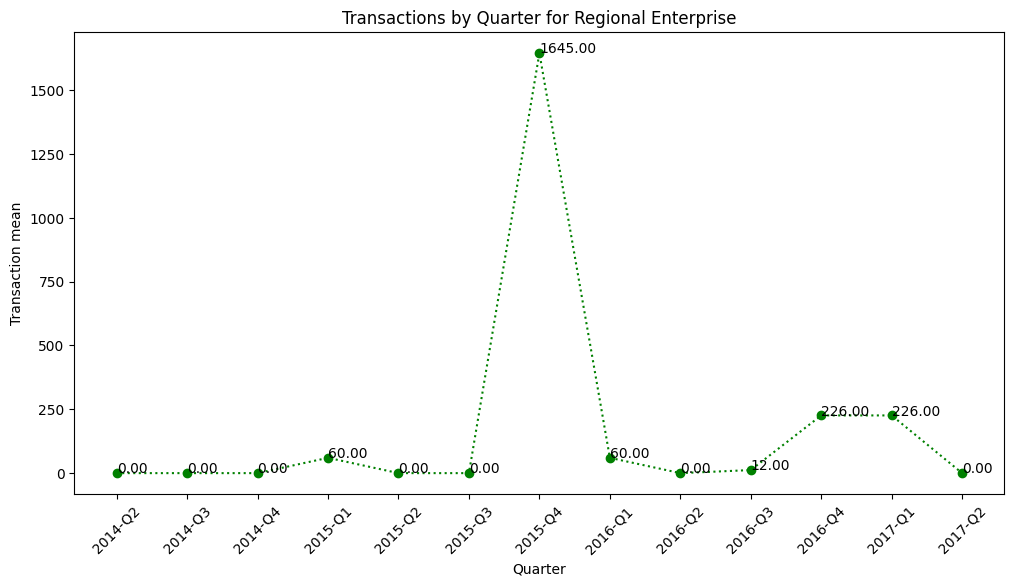

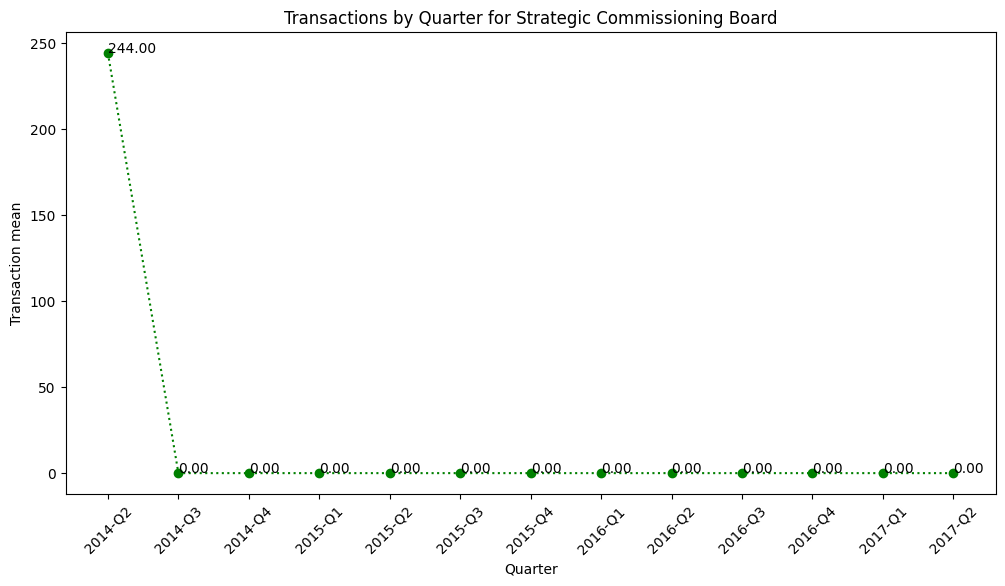

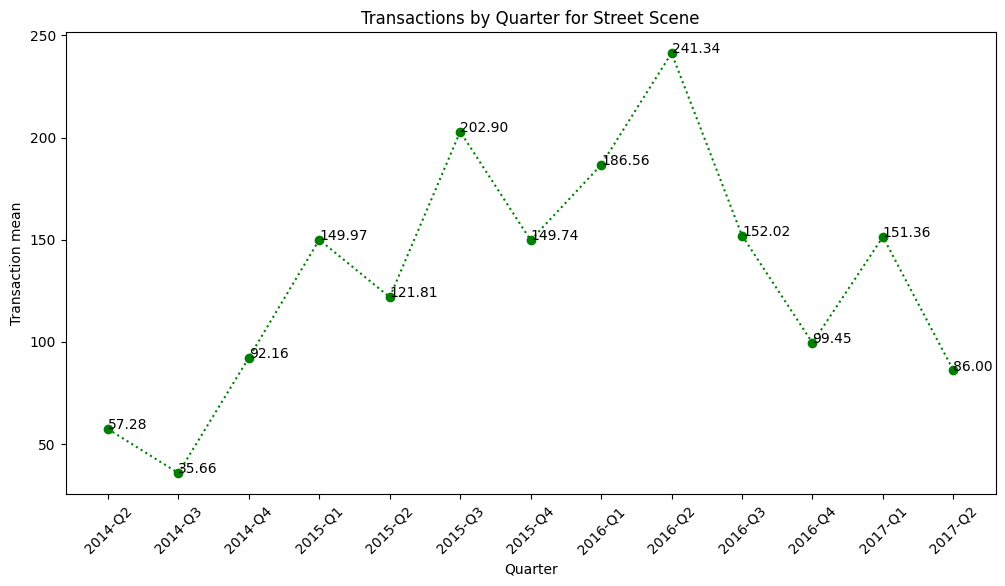

In [586]:
compare_sa_txn()

How would you like to compare the transactions?
    - count
    - mean
    - sum
     count
Line or Bar Graph?? bar
Do you want them stacked? y/n n


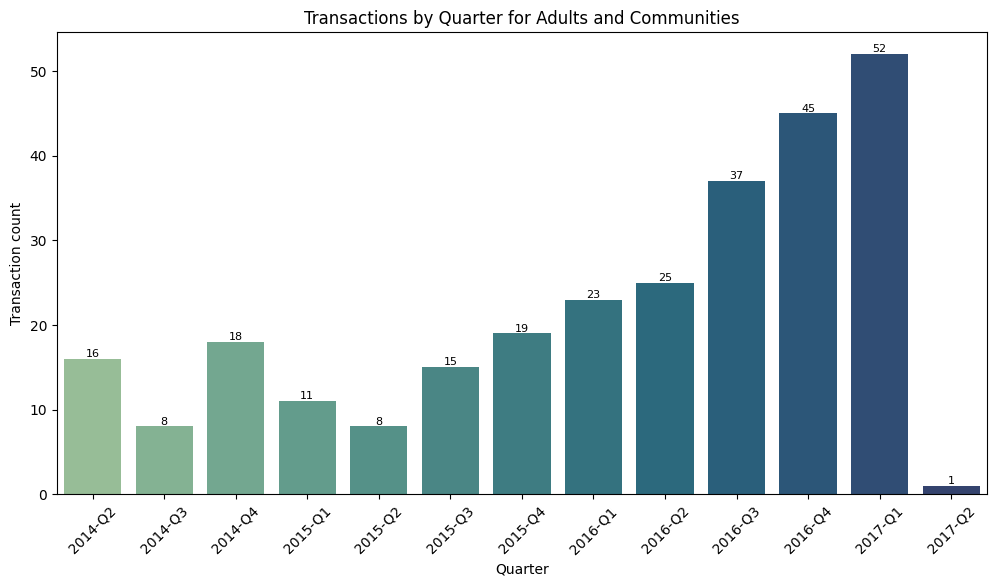

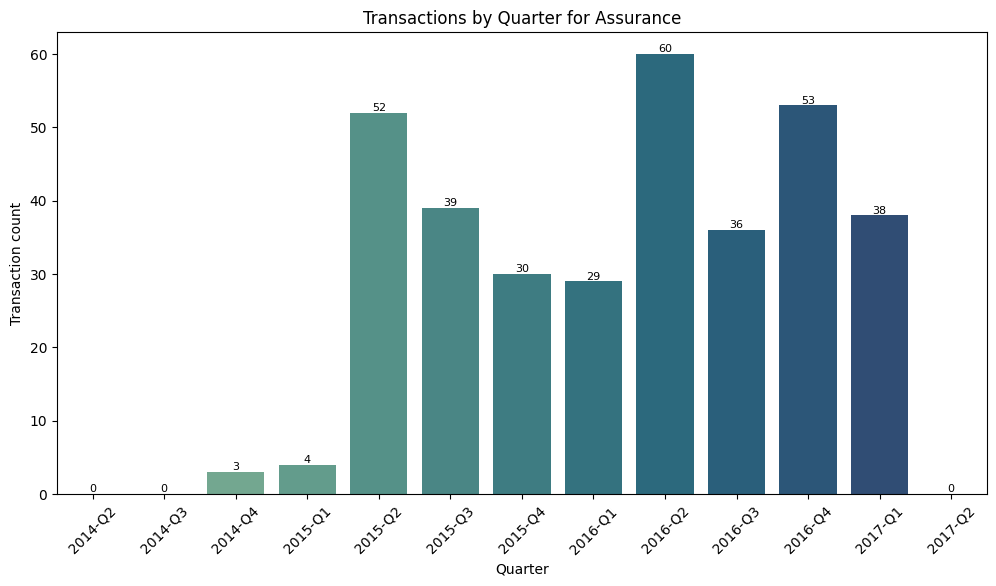

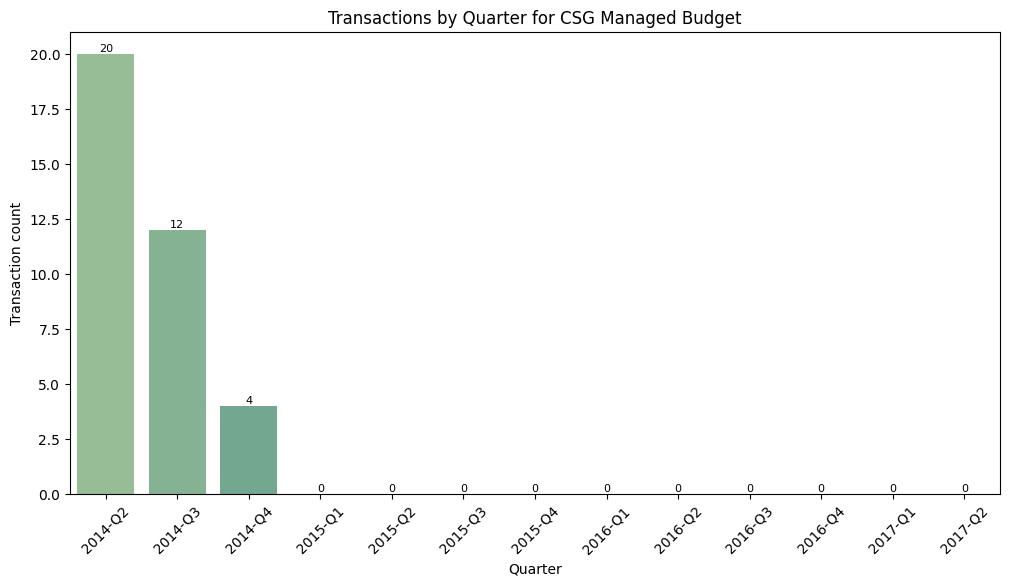

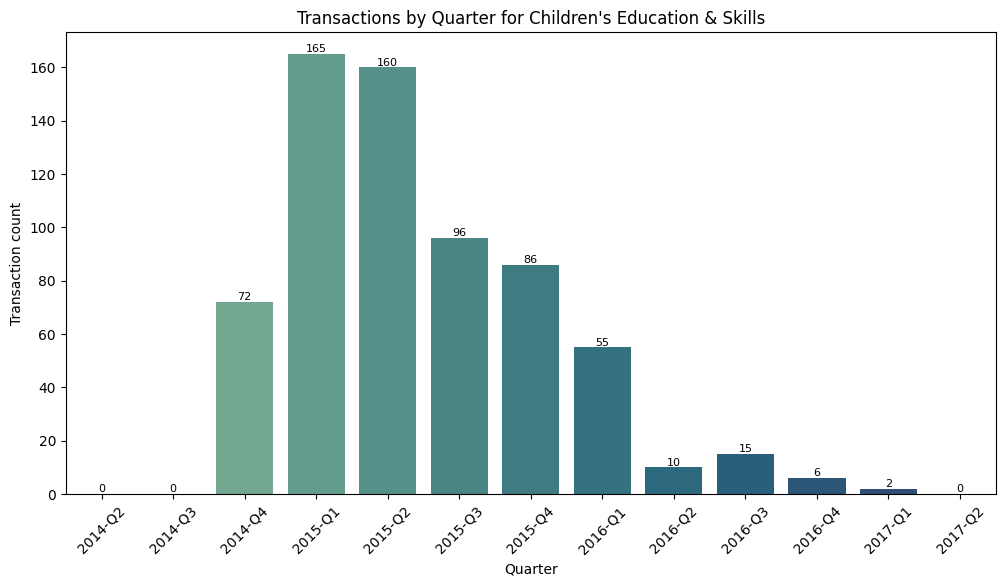

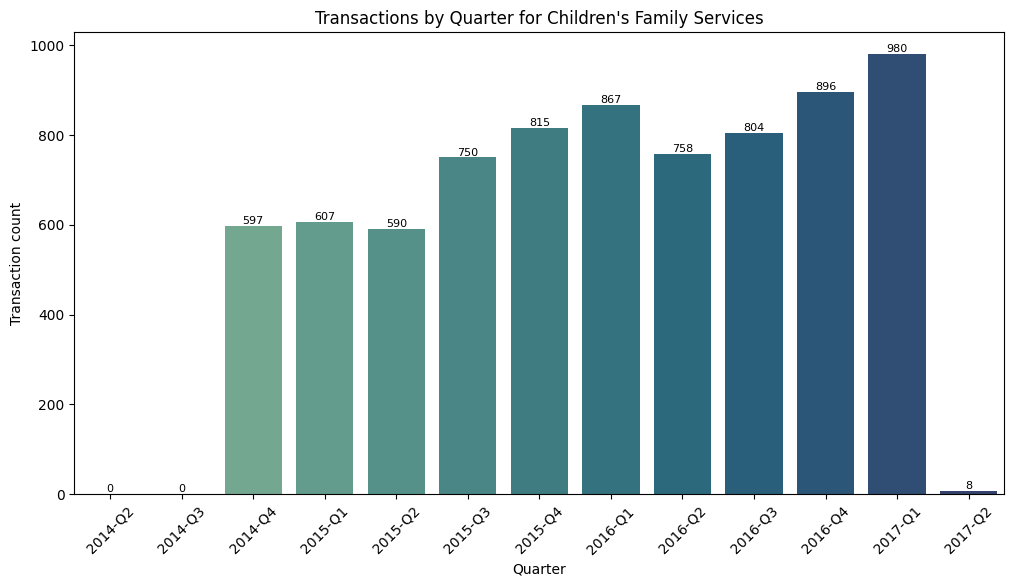

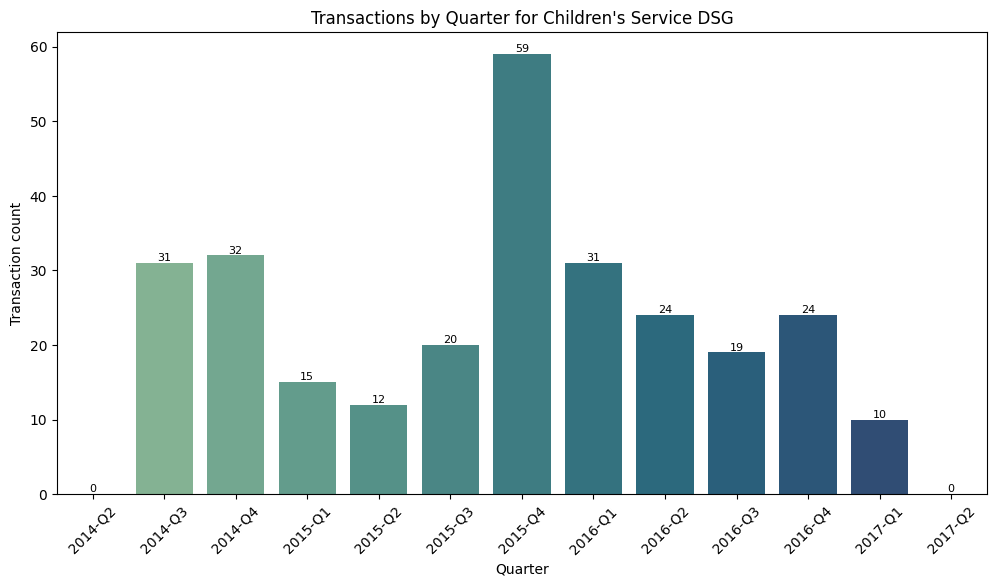

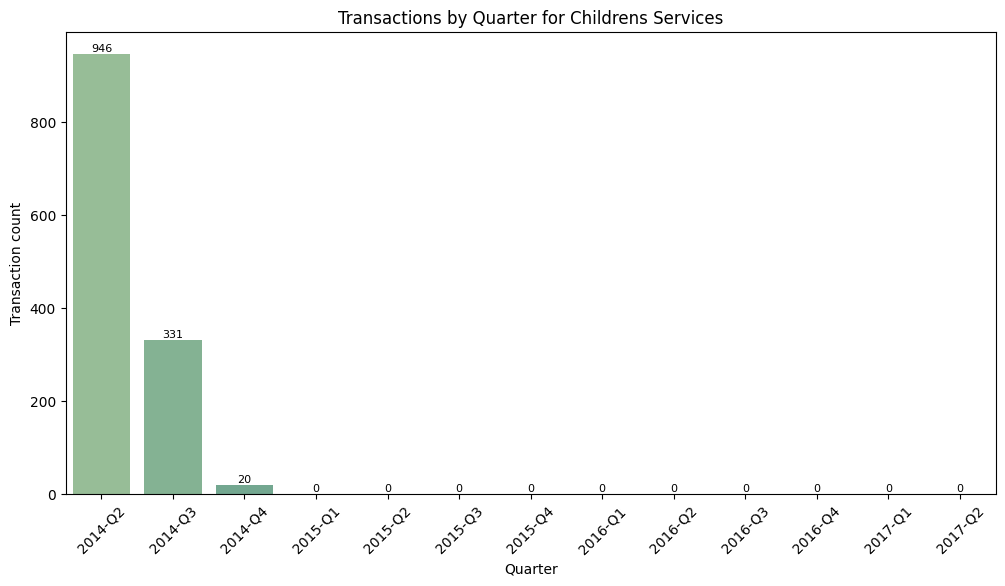

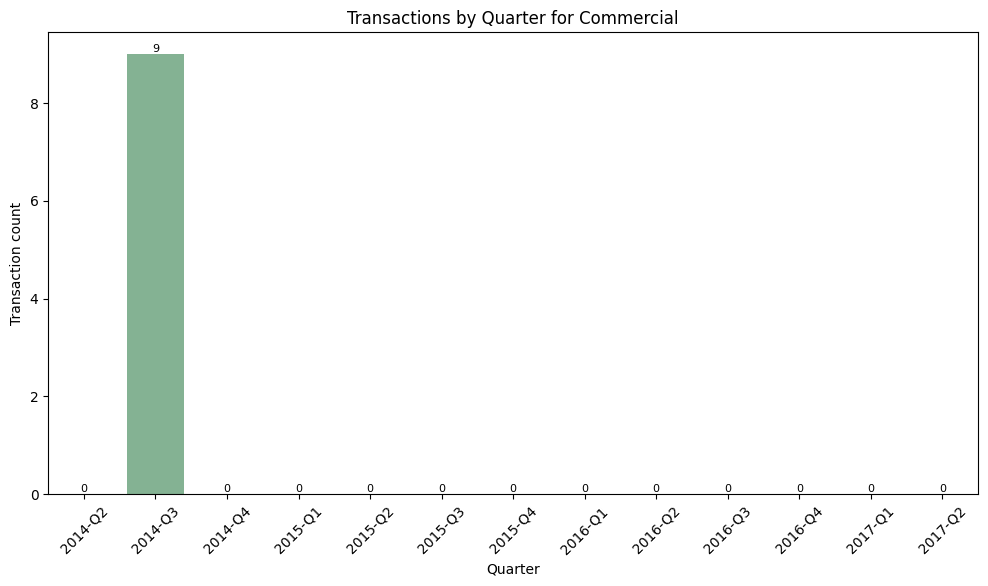

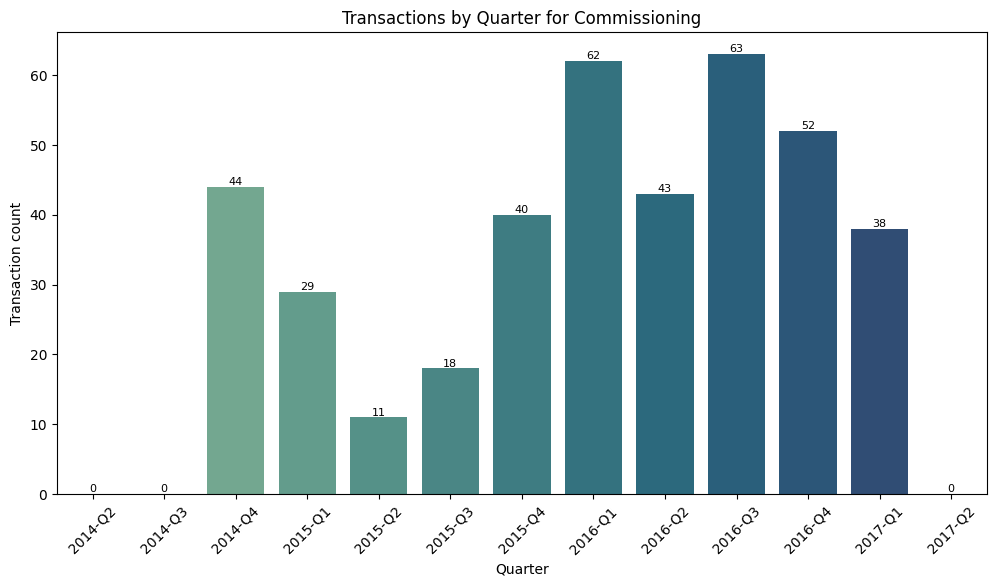

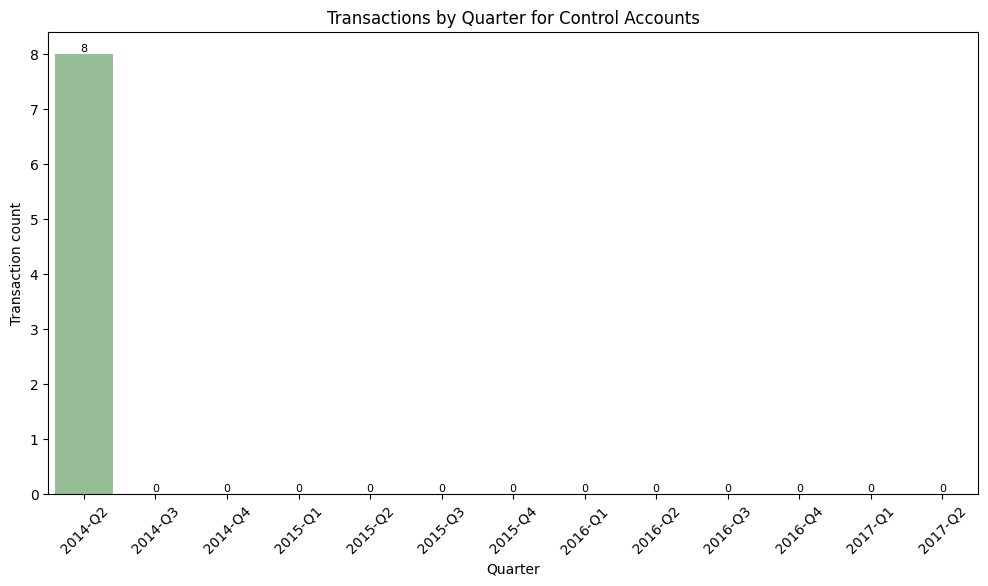

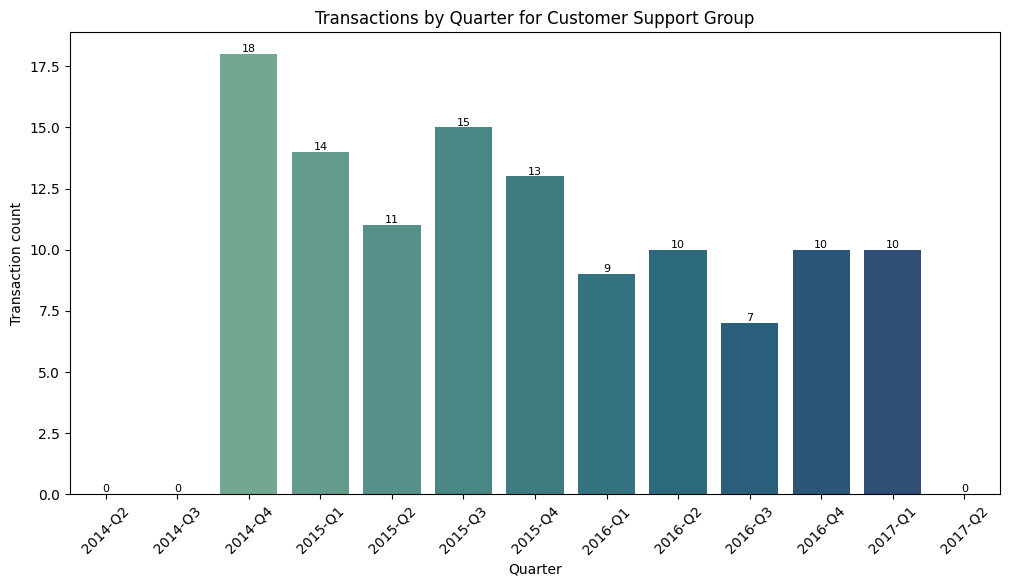

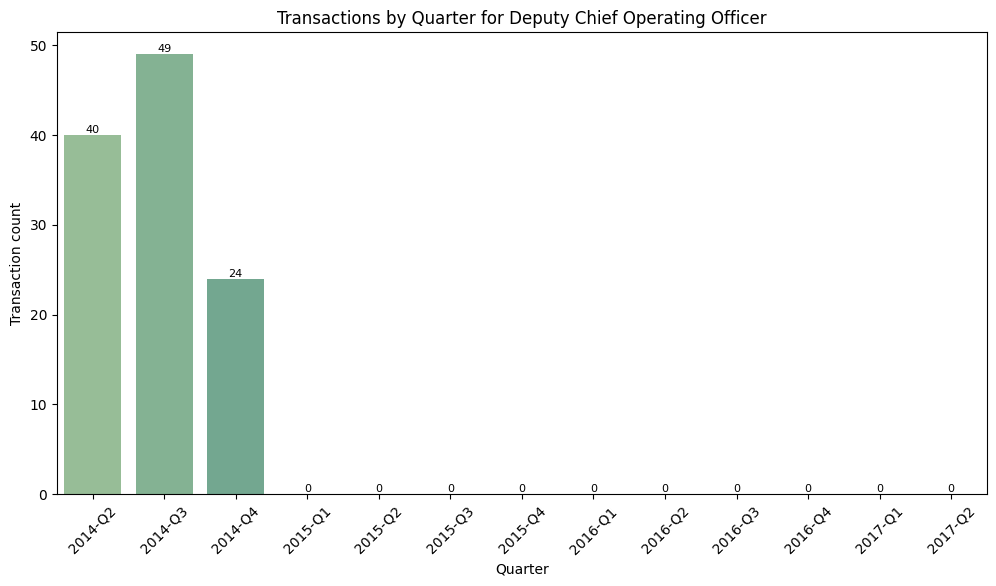

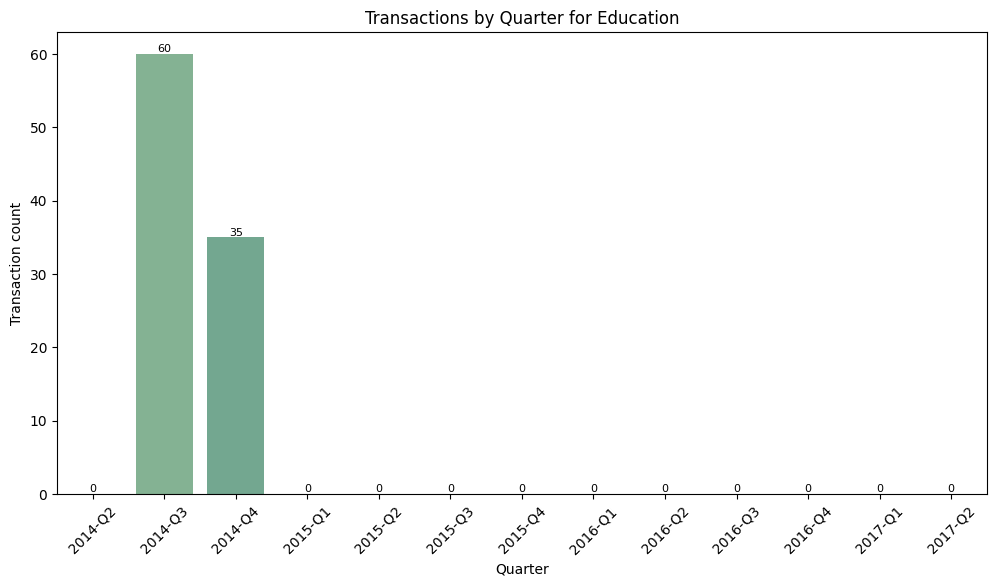

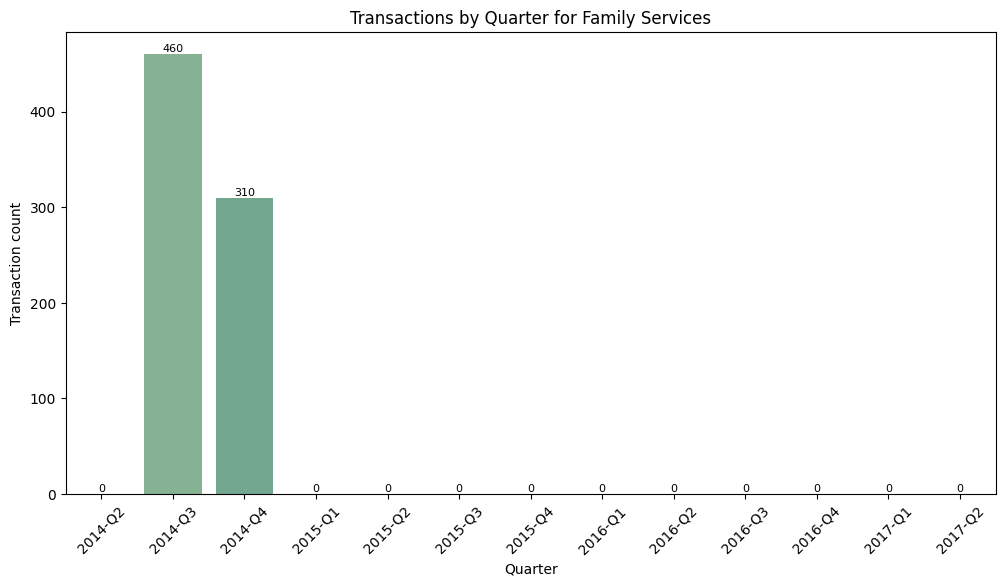

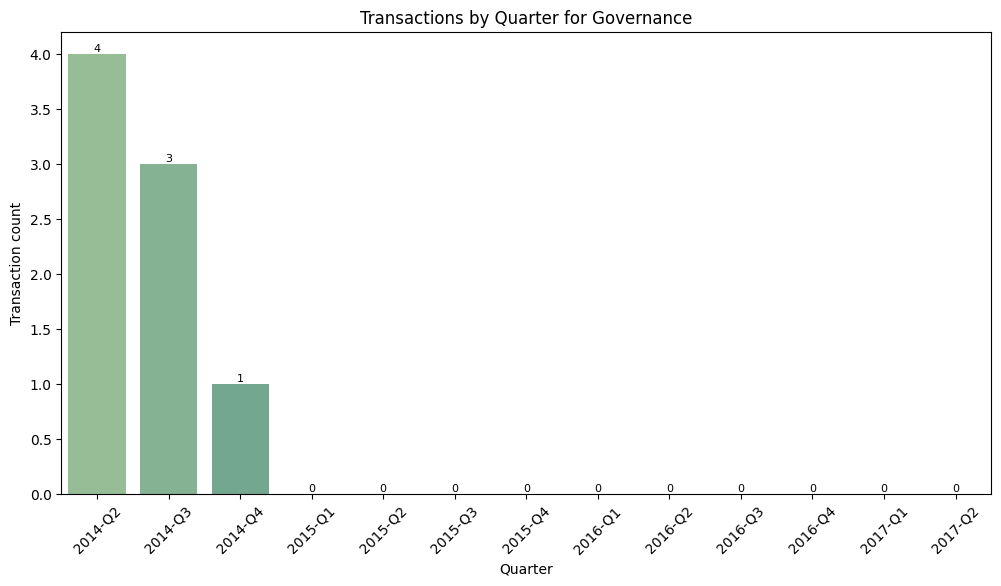

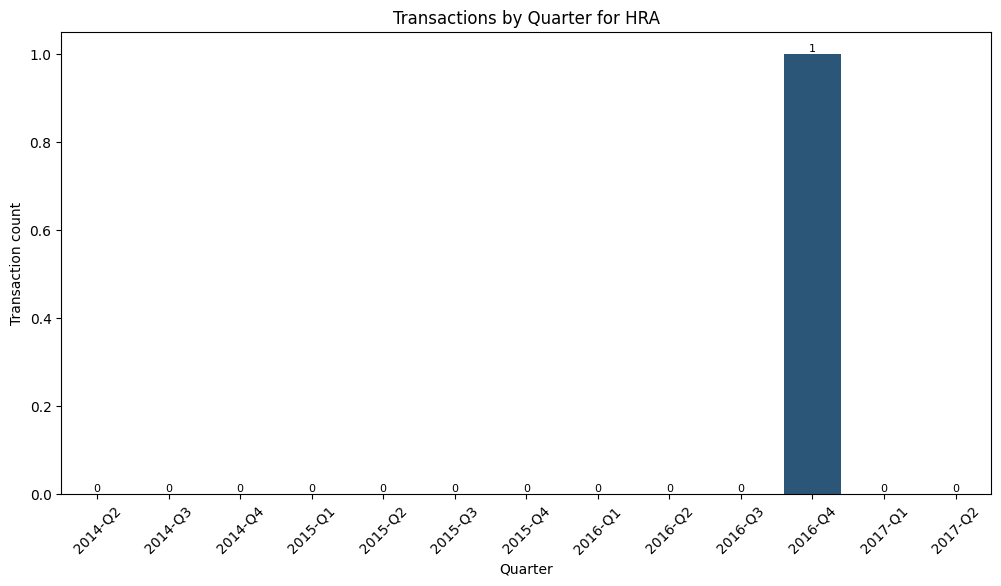

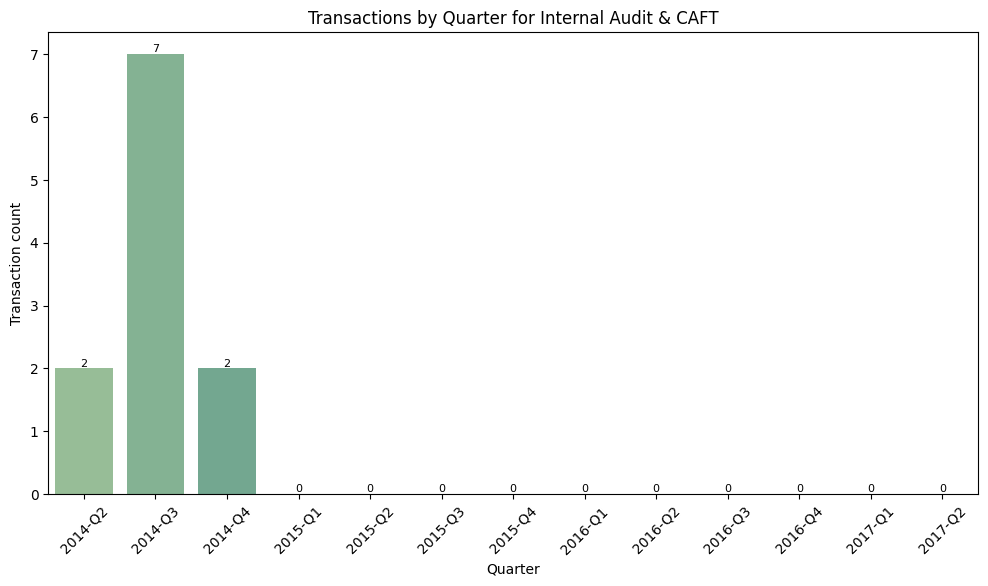

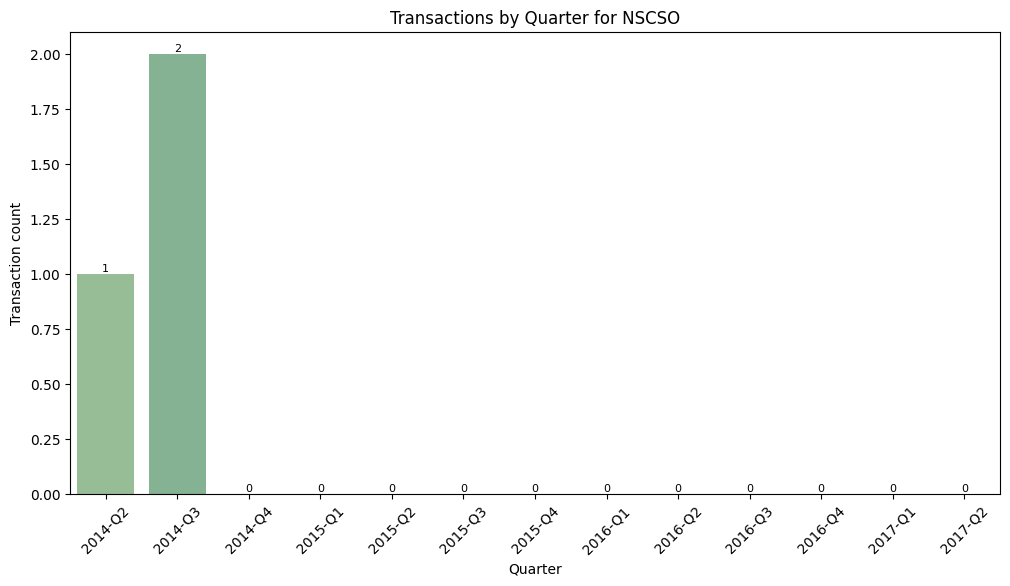

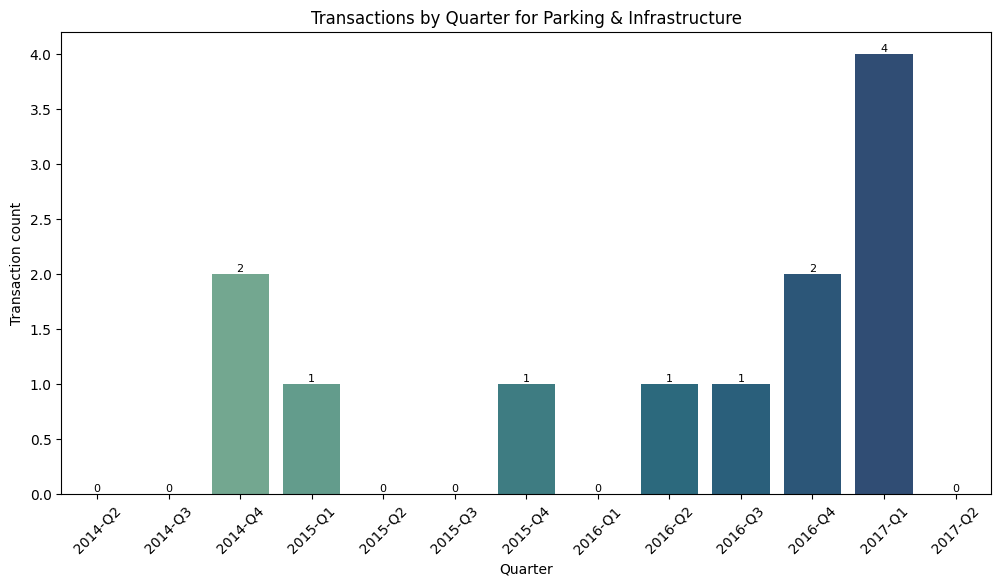

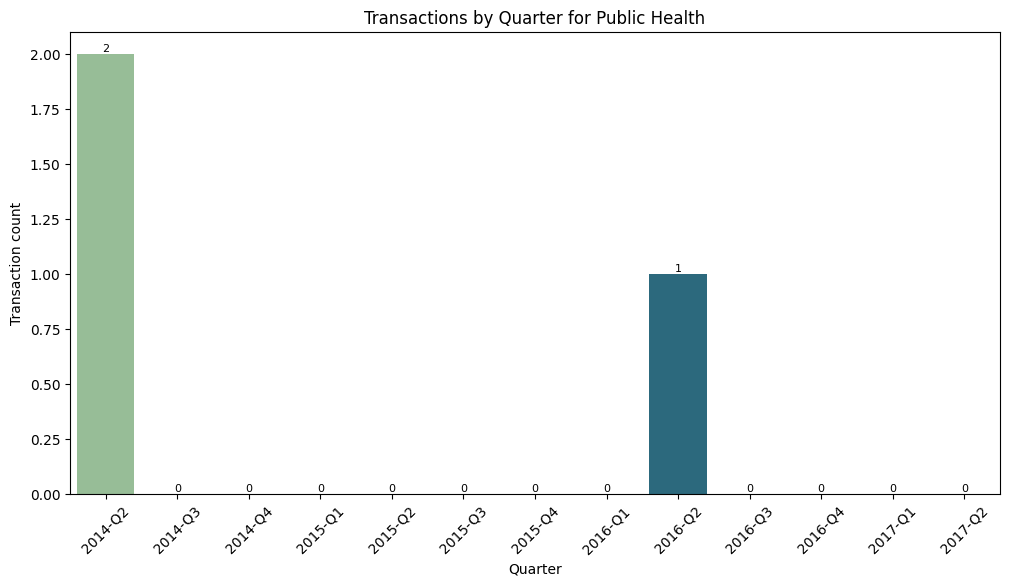

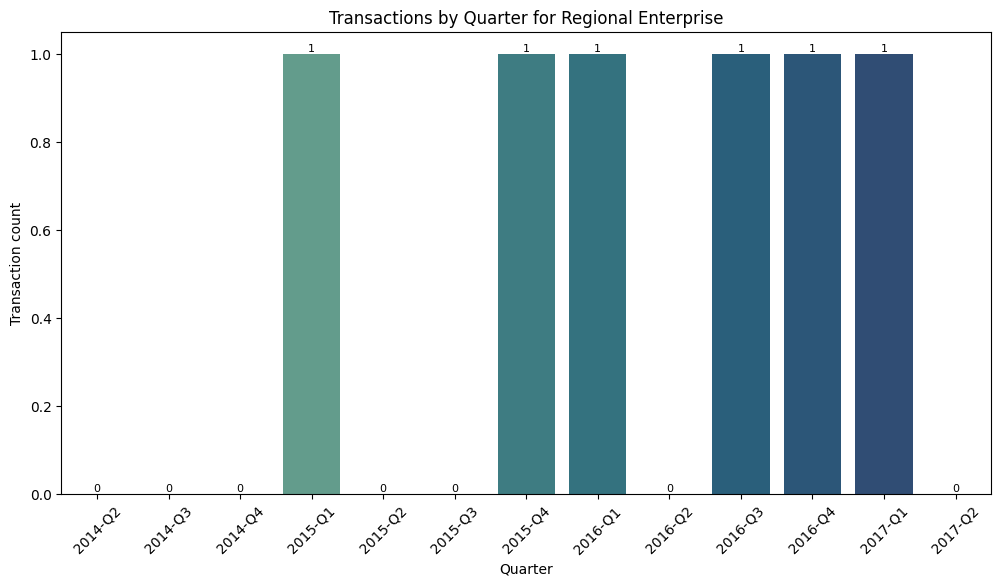

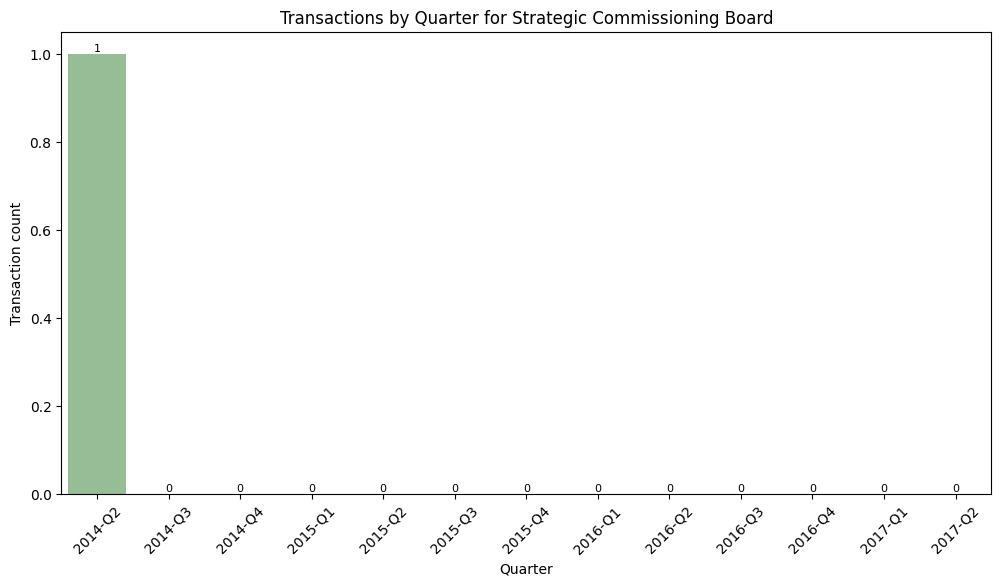

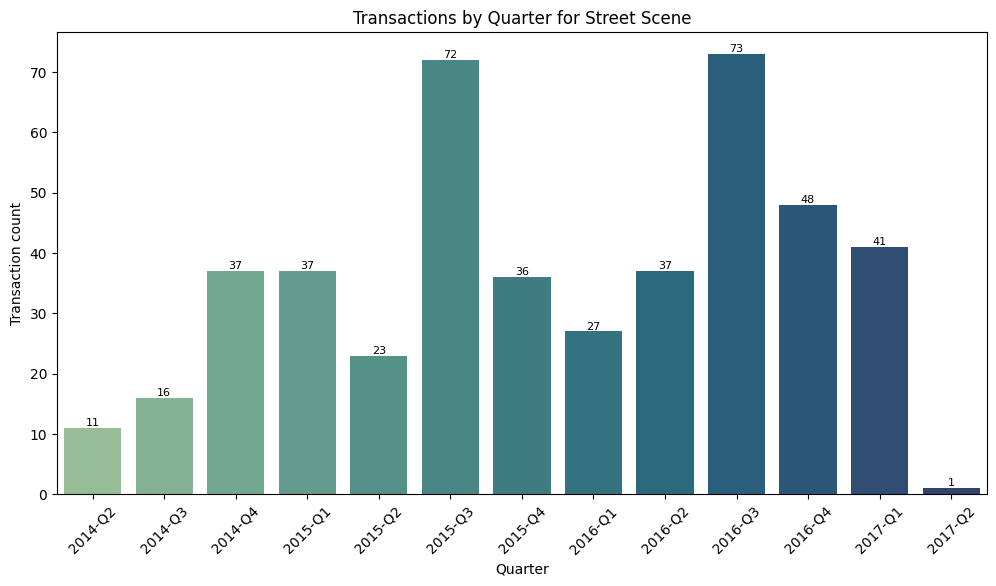

In [328]:
compare_sa_txn()

## Identifying Significant Changes in the data


In [617]:
surges_list = []
permanent_list = []


In [618]:
# Lets use two approaches for it
# setting threshold 2 folds for spikes
def identify_changes(data):
    seen = [data.values[0]]
    surges = []
    surge_start = None
    permanent = False
    for i in range(1,len(data)):
        cur_avg = np.mean(seen)
        val = data.values[i]
        if val/cur_avg >2:
            permanent = True
            surge_start = data.index[i]
            print( f"Surge Noticed at {data.index[i]}. Transaction amount: {val}. Normal Average Transaction amount: {cur_avg}")
            surges.append(data.index[i])
            surges_list.append([None,data.index[i],cur_avg, val])
        if val//cur_avg <0.5:
            permanent = False
            surge_start = None
            
        seen.append(val)
    
    if permanent:
        permanent_list.append([None,surge_start])
        print(f'Permanent Increase in Transaction Amount after {surge_start}')
        return True, surge_start
    else:
        return False, surges

In [646]:
def check_surge(field, is_sa = True):
    # s_or_a = input('Do you want to check by service area or account? Type: s/a')
    # field = input('Enter Service Area') if s_or_a == 's' else input('Enter Account Desc') 
    filter_col = 'Service Area' if is_sa else 'Account Description'
    filtered = cct_14_16[cct_14_16[filter_col]==field].reset_index()
    grouped_filter = filtered.groupby('Quarters')['Total'].mean()
    permanent, surges = identify_changes(grouped_filter) 

    if not permanent and surges:
        for i in range(len(surges_list)):
            for j in range(len(surges_list[i])):
                surges_list[i][j] = field if  not surges_list[i][j] else surges_list[i][j] 

    if permanent:
         for i in range(len(permanent_list)):
            for j in range(len(permanent_list[i])):
                permanent_list[i][j] = field if  not permanent_list[i][j] else permanent_list[i][j]
    if is_sa:         
        sns.lineplot(data = grouped_filter,x = grouped_filter.index,y = grouped_filter.values, marker = 'o', color = 'blue')
        for x,y in zip(grouped_filter.index, grouped_filter.values):
                        label = '{:.2f}'.format(y)
                        plt.annotate(label,(x,y))
        plt.xticks(rotation=45)
        if permanent:
            sns.lineplot(data = grouped_filter.loc[surges:],x = grouped_filter.loc[surges:].index,y = grouped_filter.loc[surges:].values, color = 'red', zorder = 5 )
            plt.xticks(rotation=45)
        else:
            sns.scatterplot(data = grouped_filter.loc[surges],x = grouped_filter.loc[surges].index, y = grouped_filter.loc[surges].values, color = 'red',zorder = 5)
        plt.title(f'Surge Filtering for Transactions in {filter_col}: {field}')
        plt.xticks(rotation=45)
        plt.show()

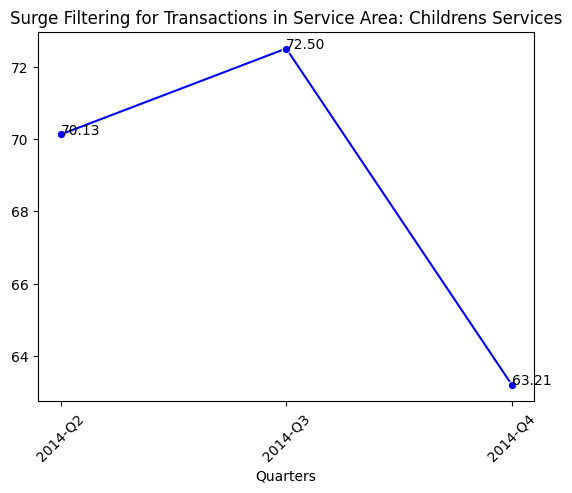

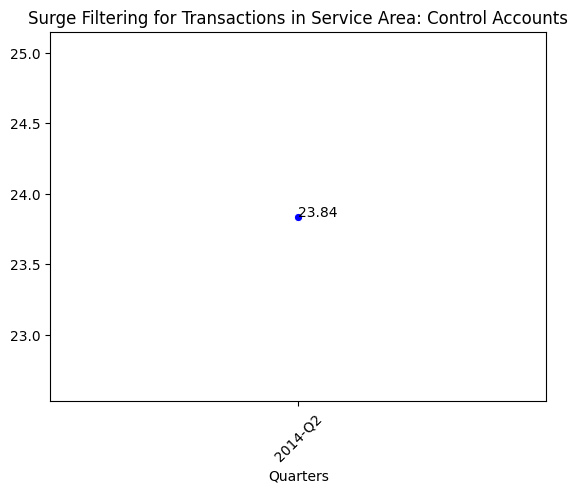

Surge Noticed at 2015-Q1. Transaction amount: 149.9683783783784. Normal Average Transaction amount: 61.70028716216216
Surge Noticed at 2015-Q3. Transaction amount: 202.89555555555555. Normal Average Transaction amount: 91.37671753819036


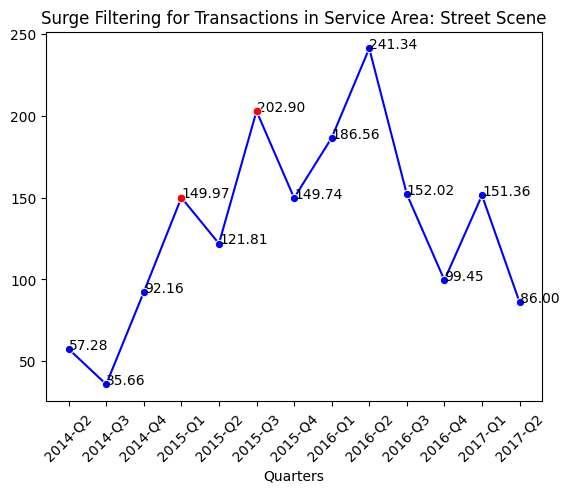

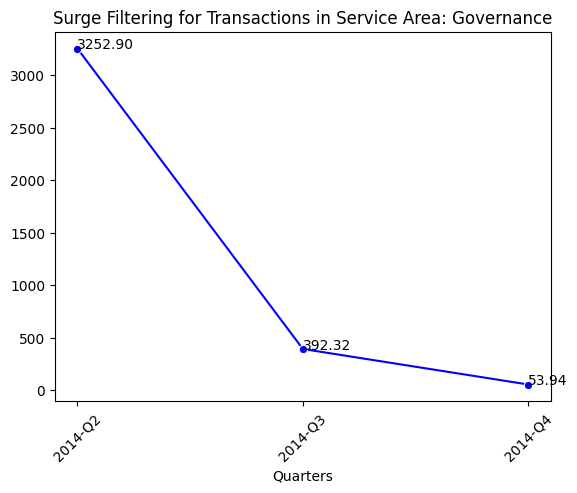

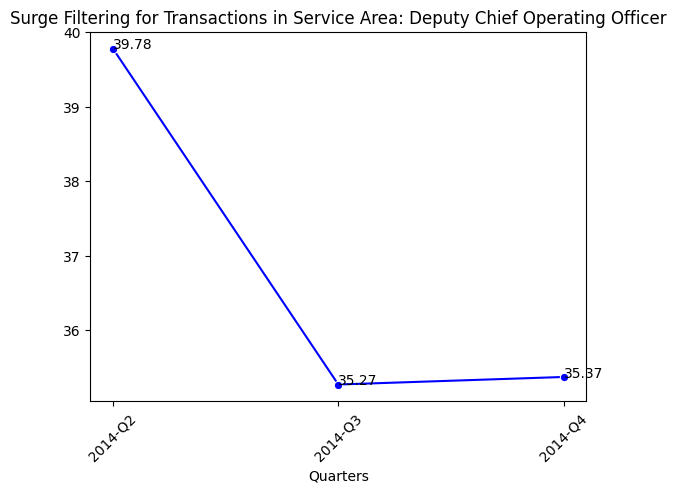

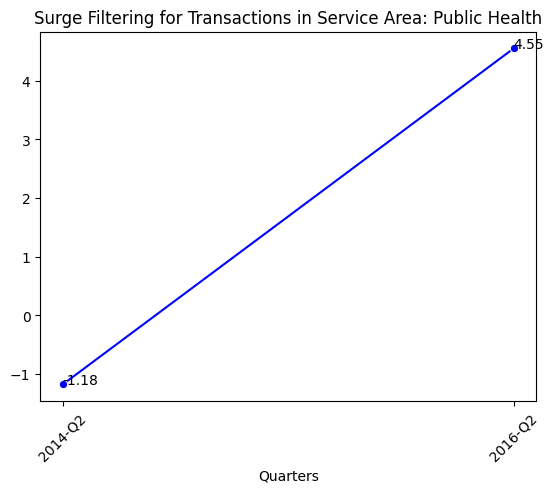

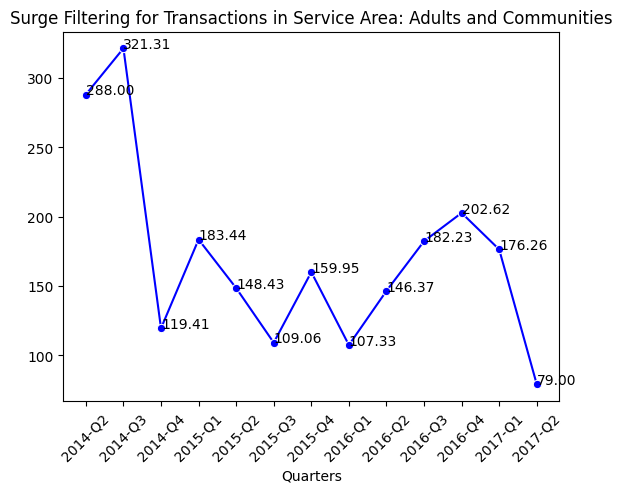

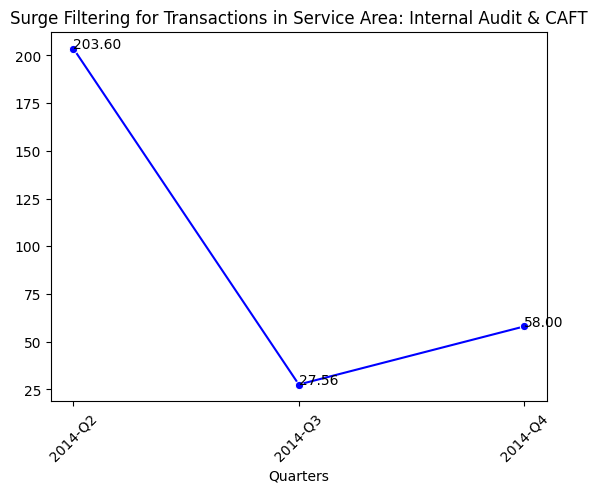

Surge Noticed at 2014-Q3. Transaction amount: 222.75. Normal Average Transaction amount: 10.0
Permanent Increase in Transaction Amount after 2014-Q3


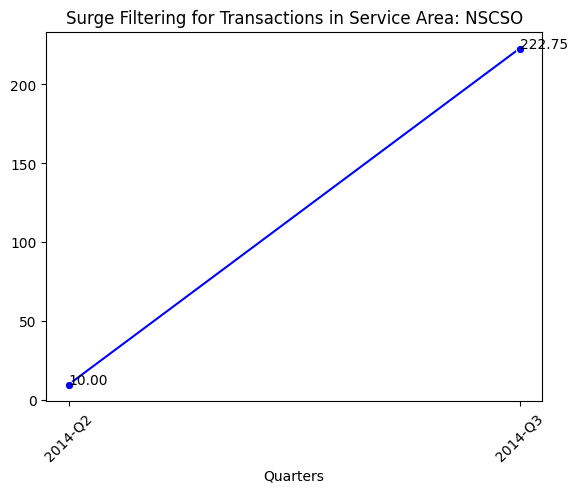

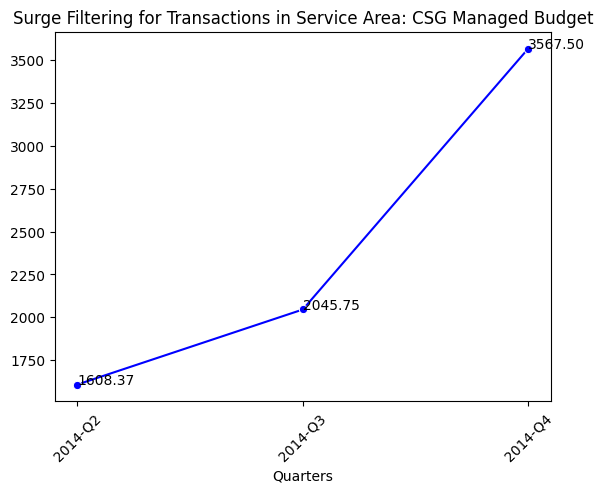

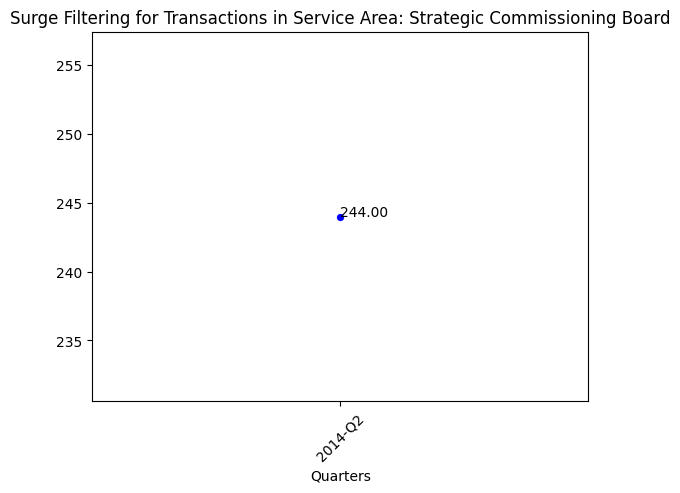

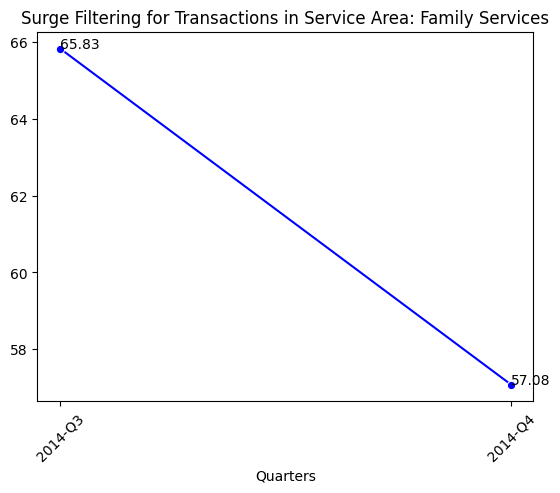

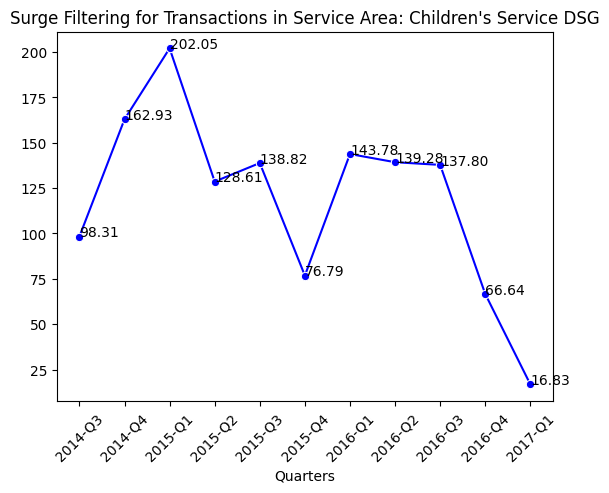

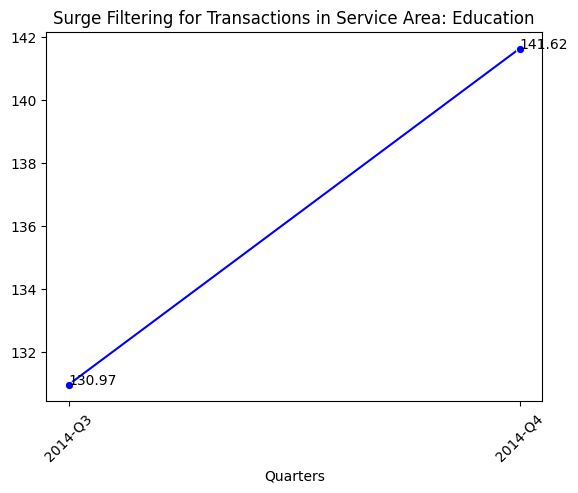

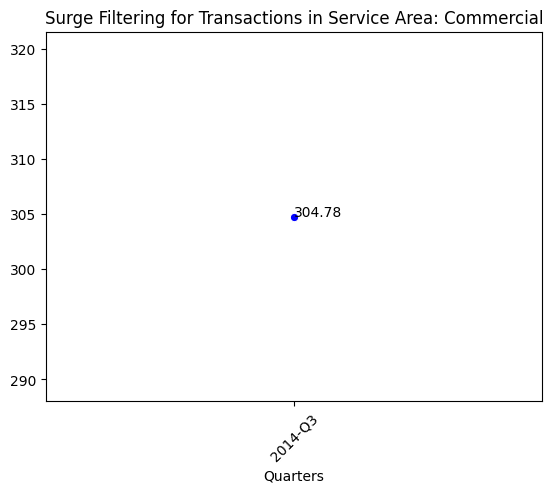

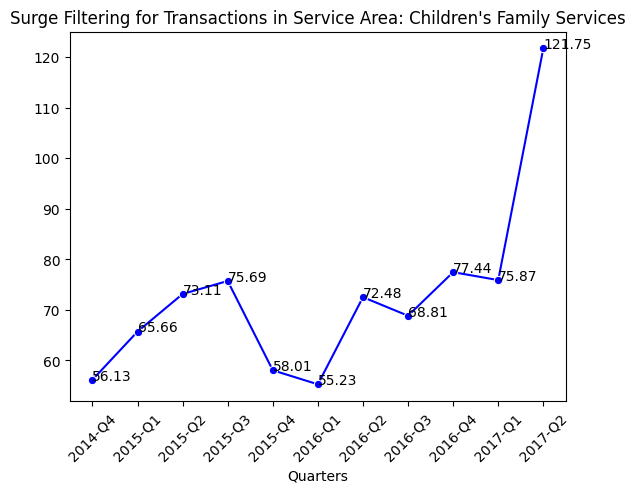

Surge Noticed at 2015-Q1. Transaction amount: 178.94620689655173. Normal Average Transaction amount: 77.85022727272727


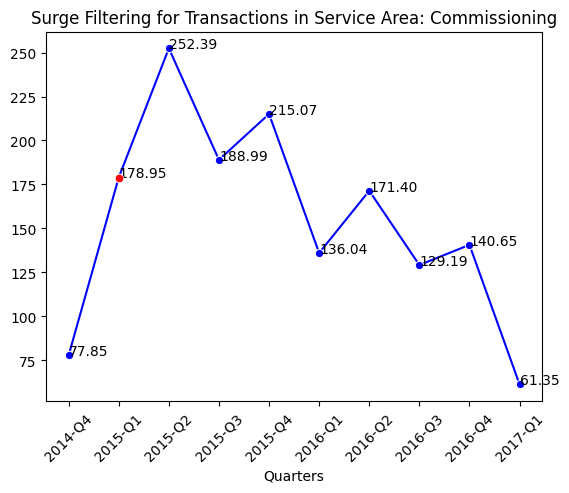

Surge Noticed at 2015-Q4. Transaction amount: 159.67. Normal Average Transaction amount: 37.42
Surge Noticed at 2016-Q2. Transaction amount: 500.0. Normal Average Transaction amount: 78.17
Surge Noticed at 2016-Q4. Transaction amount: 1784.125. Normal Average Transaction amount: 162.152


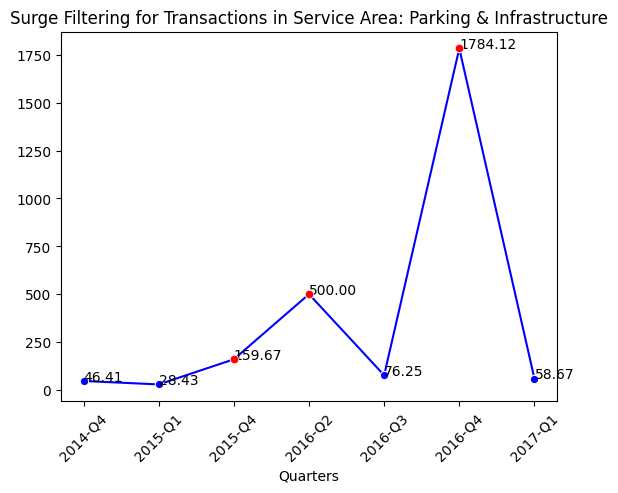

Surge Noticed at 2016-Q4. Transaction amount: 208.98499999999999. Normal Average Transaction amount: 103.73648673691861


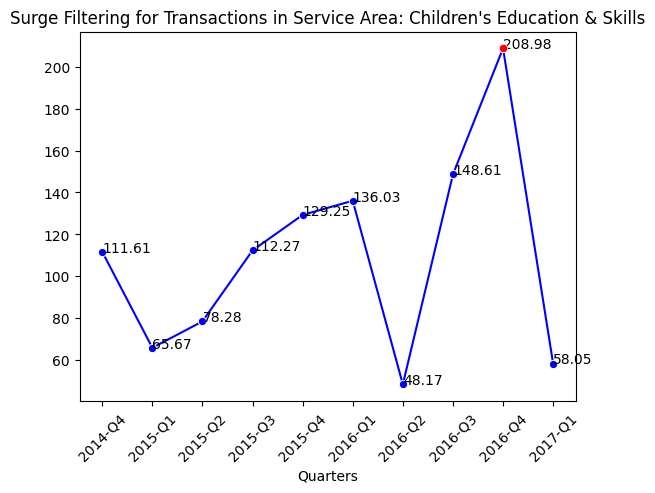

Surge Noticed at 2015-Q1. Transaction amount: 1350.0692857142858. Normal Average Transaction amount: 298.62833333333333
Surge Noticed at 2015-Q2. Transaction amount: 3148.7272727272725. Normal Average Transaction amount: 824.3488095238096


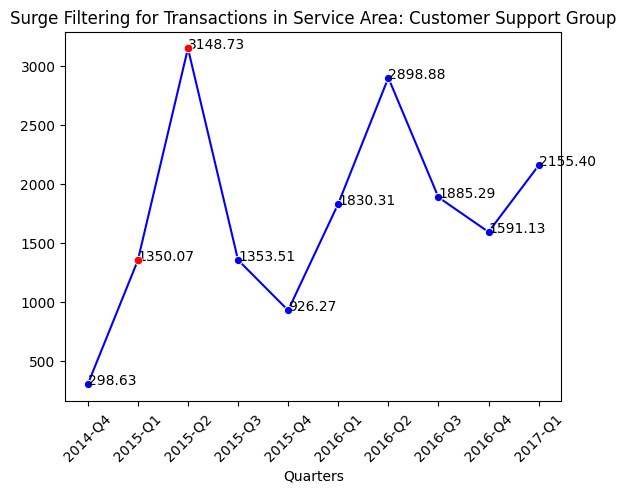

Surge Noticed at 2015-Q2. Transaction amount: 56.963461538461544. Normal Average Transaction amount: 25.98791666666667
Surge Noticed at 2016-Q2. Transaction amount: 158.504. Normal Average Transaction amount: 44.42760971117006


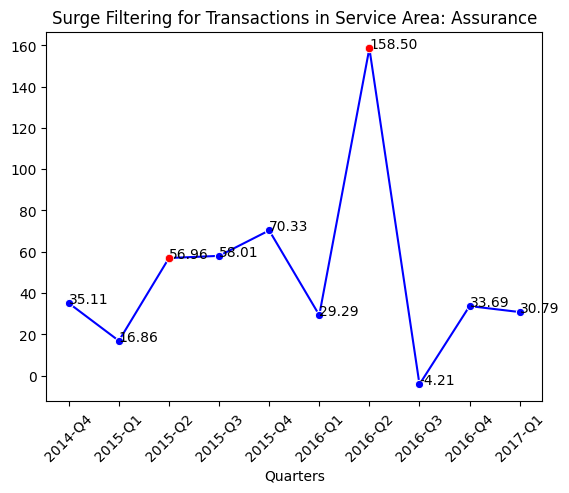

Surge Noticed at 2015-Q4. Transaction amount: 1645.0. Normal Average Transaction amount: 60.0


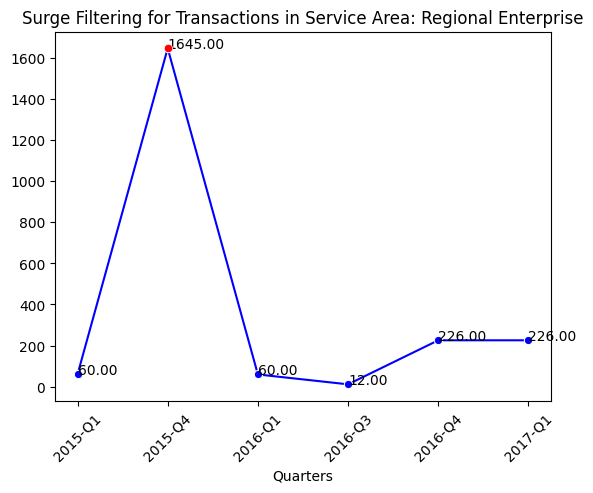

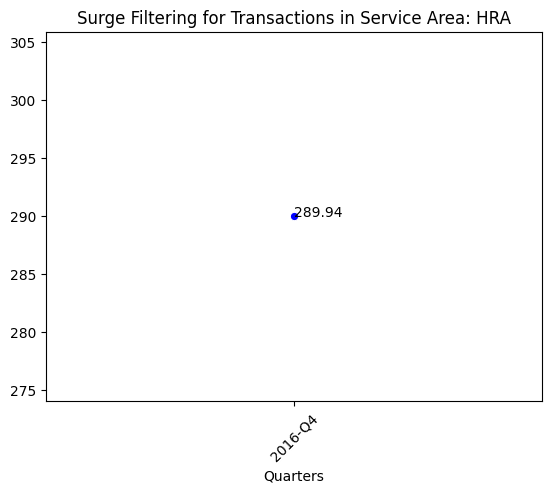

In [623]:
for area in cct_14_16['Service Area'].unique():
    check_surge(area)

In [627]:
print('All the surges in the Service Areas')
display(pd.DataFrame(surges_list,columns = ['Field','Quarter','Avg_Before','Spiked Total']))
print('-'*150)

print('All the permanents in the Service Areas')
display(pd.DataFrame(permanent_list,columns = ['Field','Quarter After']))

All the surges in the Service Areas


Field  Quarter  Avg_Before  Spiked Total
0                    Street Scene  2015-Q1   61.700287    149.968378
1                    Street Scene  2015-Q3   91.376718    202.895556
2                   Commissioning  2014-Q3   10.000000    222.750000
3                   Commissioning  2015-Q1   77.850227    178.946207
4        Parking & Infrastructure  2015-Q4   37.420000    159.670000
5        Parking & Infrastructure  2016-Q2   78.170000    500.000000
6        Parking & Infrastructure  2016-Q4  162.152000   1784.125000
7   Children's Education & Skills  2016-Q4  103.736487    208.985000
8          Customer Support Group  2015-Q1  298.628333   1350.069286
9          Customer Support Group  2015-Q2  824.348810   3148.727273
10                      Assurance  2015-Q2   25.987917     56.963462
11                      Assurance  2016-Q2   44.427610    158.504000
12            Regional Enterprise  2015-Q4   60.000000   1645.000000

------------------------------------------------------------------------------------------------------------------------------------------------------
All the permanents in the Service Areas


Field Quarter After
0  NSCSO       2014-Q3

In [626]:
permanent_list


[['NSCSO', '2014-Q3']]

In [649]:
surges_list = []
permanent_list = []


In [650]:
for account in cct_14_16['Account Description'].unique():
    check_surge(account,is_sa=False)

print('All the surges in the Accounts')
display(pd.DataFrame(surges_list,columns = ['Field','Quarter','Avg_Before','Spiked Total']))
print('-'*150)

print('All the permanents in the Accounts')
display(pd.DataFrame(permanent_list,columns = ['Field','Quarter After']))

Surge Noticed at 2017-Q2. Transaction amount: 660.0. Normal Average Transaction amount: 130.31496124887528
Permanent Increase in Transaction Amount after 2017-Q2
Surge Noticed at 2014-Q3. Transaction amount: 76.51565217391305. Normal Average Transaction amount: 18.442831325301206
Surge Noticed at 2015-Q2. Transaction amount: 135.31599999999997. Normal Average Transaction amount: 48.707064415905634
Surge Noticed at 2017-Q2. Transaction amount: 158.06. Normal Average Transaction amount: 71.75537320531218
Permanent Increase in Transaction Amount after 2017-Q2
Surge Noticed at 2014-Q3. Transaction amount: 104.48032258064515. Normal Average Transaction amount: 23.108823529411765
Surge Noticed at 2015-Q3. Transaction amount: 104.39999999999999. Normal Average Transaction amount: 36.61031176169392
Surge Noticed at 2014-Q3. Transaction amount: 188.20615384615382. Normal Average Transaction amount: 64.39483870967742
Surge Noticed at 2016-Q4. Transaction amount: 223.18030769230768. Normal Averag

Field  Quarter   Avg_Before  Spiked Total
0   Building Repairs & Maintenance  2017-Q2   130.314961    660.000000
1   Building Repairs & Maintenance  2014-Q3    18.442831     76.515652
2   Building Repairs & Maintenance  2015-Q2    48.707064    135.316000
3                       Stationery  2017-Q2    71.755373    158.060000
4                       Stationery  2014-Q3    23.108824    104.480323
5                       Stationery  2015-Q3    36.610312    104.400000
6           Miscellaneous Expenses  2014-Q3    64.394839    188.206154
7           Miscellaneous Expenses  2016-Q4    94.395339    223.180308
8   Private Contractors - Third Pa  2015-Q1   164.429451    352.485000
9   Other Indirect Employee Expens  2015-Q2   994.887136   2694.800000
10  Other Indirect Employee Expens  2016-Q2   924.522735   3195.443333
11  Other Indirect Employee Expens  2016-Q3  1176.847246   3342.750000
12  Other Indirect Employee Expens  2015-Q1    22.778333     47.240000
13  Other Indirect Employee Expens  2015-Q2    30.932222     95.154000
14  Other Indirect Employee Expens  2015-Q4    41.439133    122.931667
15             Grounds maintenance  2015-Q3    56.953750   1477.800000
16             Grounds maintenance  2015-Q2   153.493889    340.000000
17           Vehicle Running Costs  2015-Q1    21.116140    136.658000
18           Vehicle Running Costs  2015-Q2    50.001605    354.100000
19           Vehicle Running Costs  2015-Q3   110.821284    230.549800
20           Professional Services  2016-Q3   281.346825    673.443333
21           Professional Services  2017-Q1   330.164036   1194.000000
22           Professional Services  2015-Q1   200.055000    727.836000
23           Professional Services  2015-Q4   288.400200    905.835000
24  Clothing - Protective Clothing  2015-Q3    48.240000    124.000000
25         General Office Expenses  2015-Q2    63.333333    258.790000
26                      Venue Hire  2016-Q2    45.958333   4342.200000
27        E19 - Learning Resources  2016-Q2    31.894167    136.010000
28        E19 - Learning Resources  2015-Q2     4.592000     49.990000
29        E19 - Learning Resources  2015-Q3    27.291000     70.461111
30                           Rents  2015-Q4   156.265208    429.752500
31                           Rents  2016-Q4   230.570583   1029.646000
32                           Rents  2015-Q3    20.691667     89.626667
33                           Rents  2016-Q4   109.945000    422.036667
34                           Rents  2017-Q1   213.975556   2048.030000
35                           Rents  2016-Q3   178.297500   1168.733333
36                  Ttl IT & Comms  2016-Q4    29.970000    117.475000
37                            None  2016-Q2    60.000000    900.000000

------------------------------------------------------------------------------------------------------------------------------------------------------
All the permanents in the Accounts


Field Quarter After
0                  Other Services       2017-Q2
1                      Food Costs       2017-Q2
2            Legal and Court Fees       2016-Q3
3                     Advertising       2015-Q3
4             Conference Expenses       2017-Q1
5              Hardware Purchases       2016-Q2
6  Other Agencies - Third Party P       2016-Q4
7         E25 - Catering Supplies       2015-Q3
8                     Electricity       2017-Q1
9                Consultants Fees       2016-Q2

## Classification Pattern for Creditors

In [659]:
acc_classes = cct_14_16.groupby('Creditor')['Account Description'].nunique()
len(acc_classes)

1936

In [658]:
len([c for c in acc_classes if c !=1])

474

It is seen that 474 out of 1936 creditors were classified in more than one account 

In [668]:
#Lets visualize some of the creditors and the number of labels they got classified 
acc_classes =  acc_classes.sort_values(ascending=False)

In [685]:
acc_classes = acc_classes.reset_index()

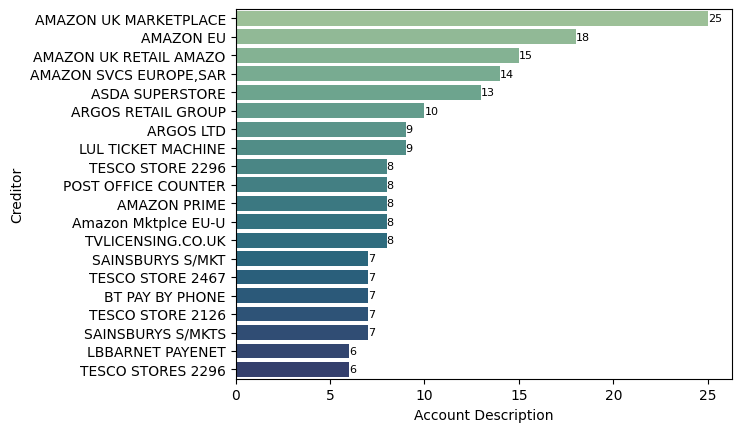

In [694]:
top_20 =  acc_classes[:20]

ax = sns.barplot(data = top_20, y = 'Creditor', x = 'Account Description', palette ='crest')
ax.bar_label(ax.containers[0], fontsize=8)
plt.title

plt.show()


In [710]:
grouped_sa_count_mean = cct_14_16.groupby('Service Area')['Total'].agg(('count','mean'))

In [711]:
grouped_sa_count_mean = grouped_sa_count_mean.reset_index()
grouped_sa_count_mean

Service Area  count         mean
0           Adults and Communities    278   174.245791
1                        Assurance    344    60.090698
2               CSG Managed Budget     36  1971.842778
3    Children's Education & Skills    667    97.230255
4       Children's Family Services   7672    68.223004
5           Children's Service DSG    277   116.708556
6               Childrens Services   1297    70.626245
7                       Commercial      9   304.783333
8                    Commissioning    400   142.462600
9                 Control Accounts      8    23.838750
10          Customer Support Group    117  1601.541538
11  Deputy Chief Operating Officer    113    36.888319
12                       Education     95   134.896211
13                 Family Services    770    62.309078
14                      Governance      8  1780.312500
15                             HRA      1   289.940000
16           Internal Audit & CAFT     11    65.104545
17                           NSCSO      3   151.833333
18        Parking & Infrastructure     12   388.341667
19                   Public Health      3     0.733333
20             Regional Enterprise      6   371.500000
21   Strategic Commissioning Board      1   244.000000
22                    Street Scene    459   150.522418

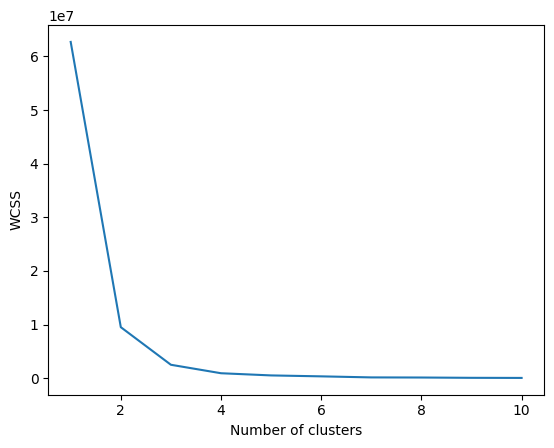

In [713]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(grouped_sa_count_mean[['count','mean']]) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [718]:
# From Elbow method, using 2 clusters for segmentation seems reasonable but lets use 3 for better cluster
clusterer = KMeans(n_clusters= 3)
grouped_sa_count_mean['cluster']  = clusterer.fit_predict(grouped_sa_count_mean[['count','mean']])

### Cluster visualization


Text(0, 0.5, 'Avg amount of transaction')

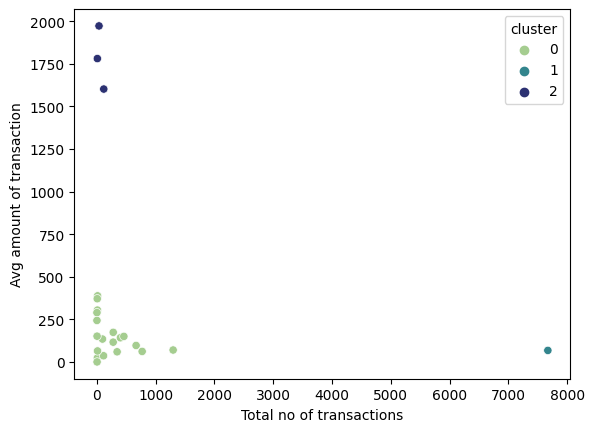

In [721]:
sns.scatterplot(grouped_sa_count_mean,x='count',y='mean',hue = 'cluster', palette='crest')
plt.xlabel('Total no of transactions')
plt.ylabel('Avg amount of transaction') 

## Anomaly Detection

In [744]:
grouped_sa_count_mean[grouped_sa_count_mean['count']<=5]


Service Area  count        mean  cluster
15                            HRA      1  289.940000        0
17                          NSCSO      3  151.833333        0
19                  Public Health      3    0.733333        0
21  Strategic Commissioning Board      1  244.000000        0

In [757]:
less_than_5 = grouped_sa_count_mean[grouped_sa_count_mean['count']<=5]['Service Area']
more_than_5 = [area for area in cct_14_16['Service Area'].unique() if area not in less_than_5 ]

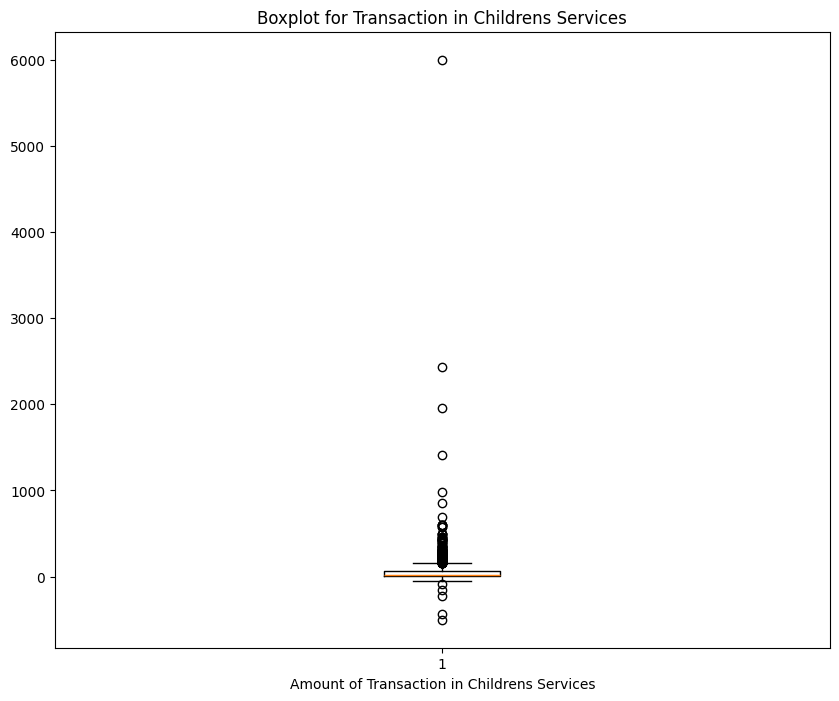

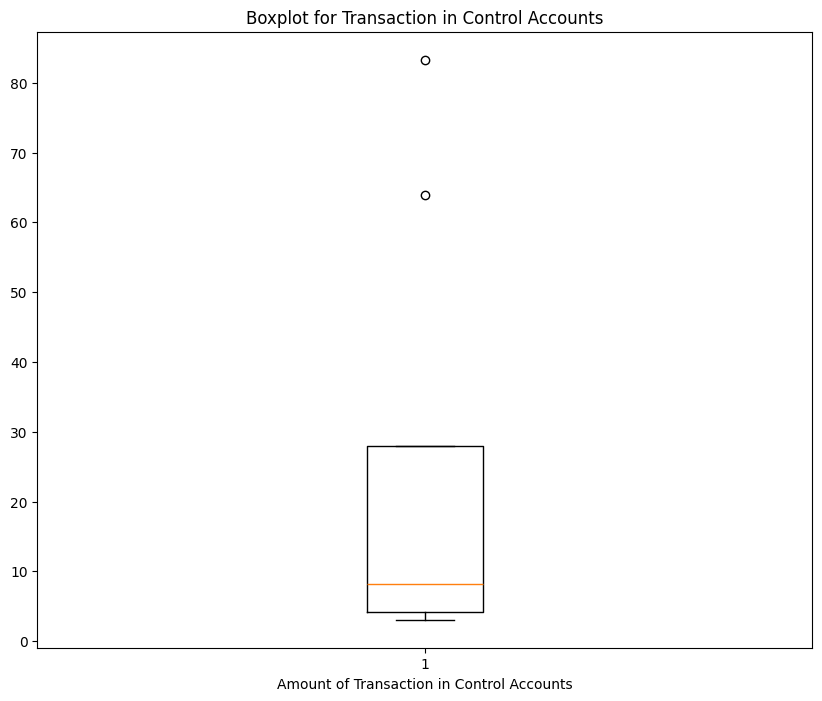

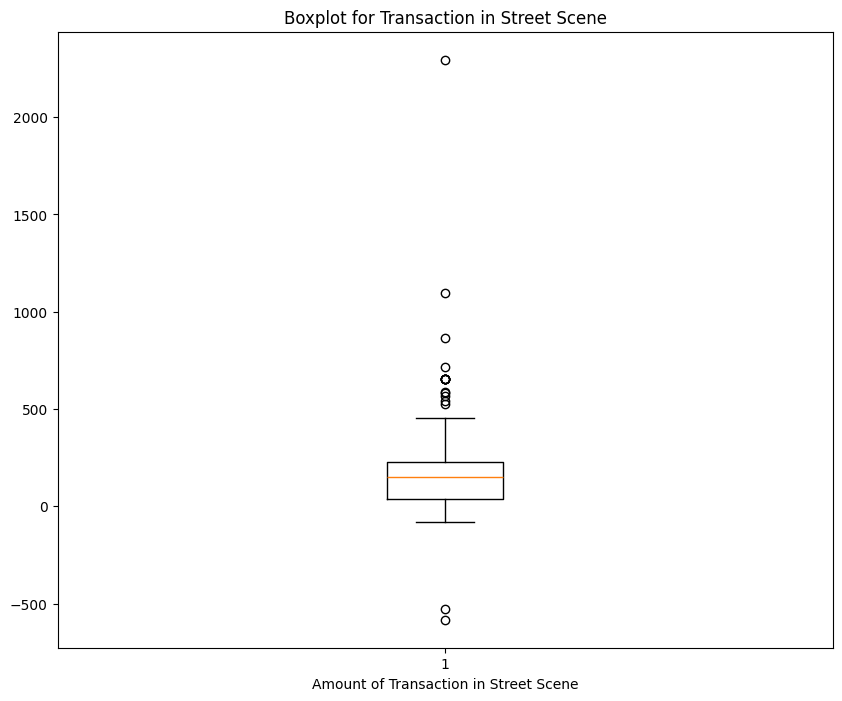

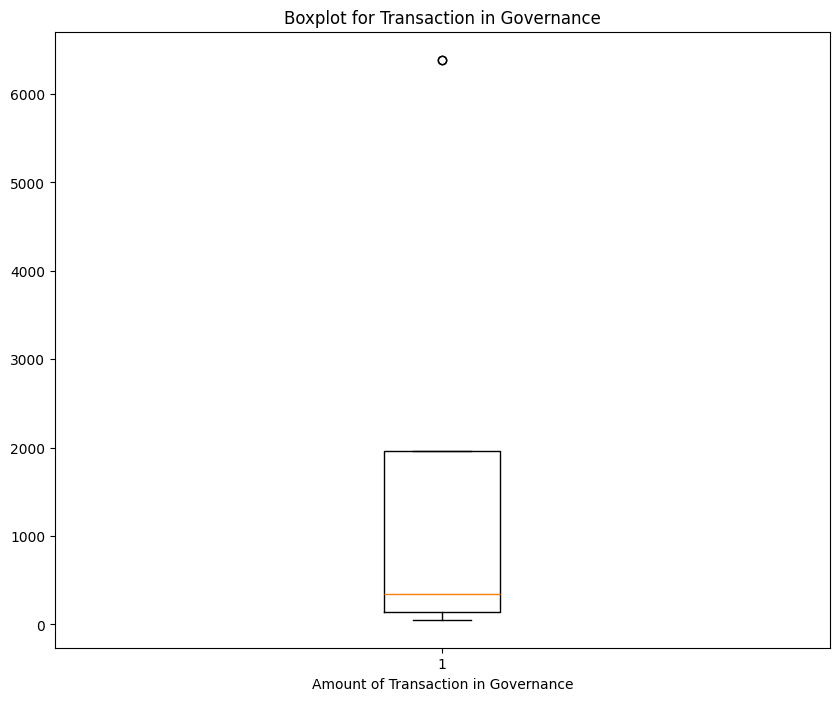

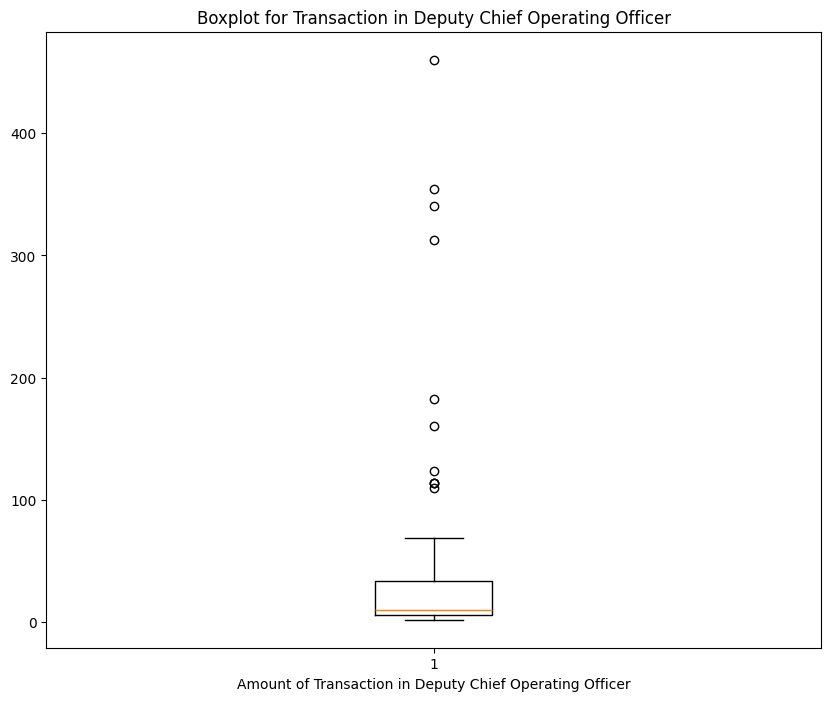

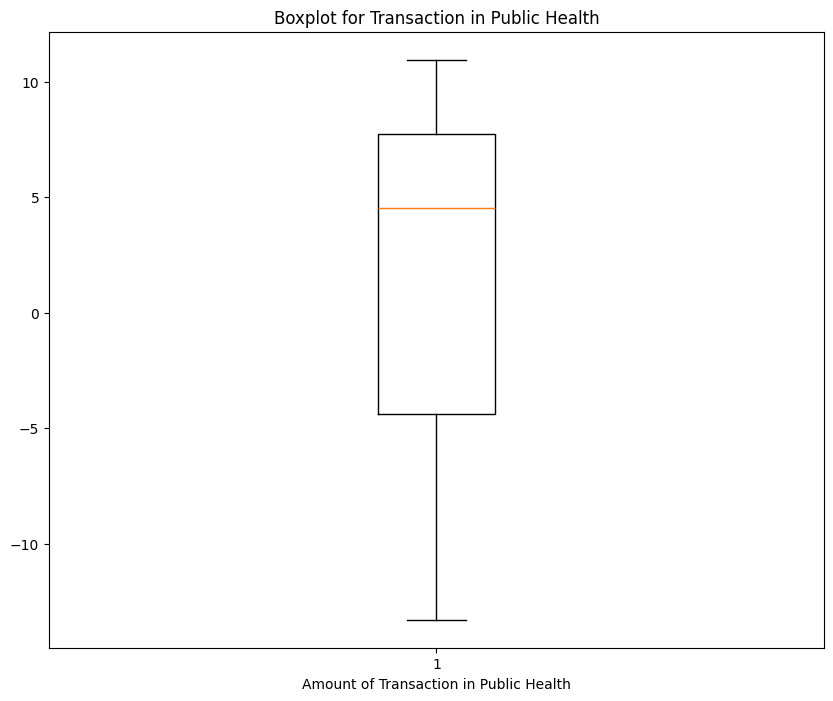

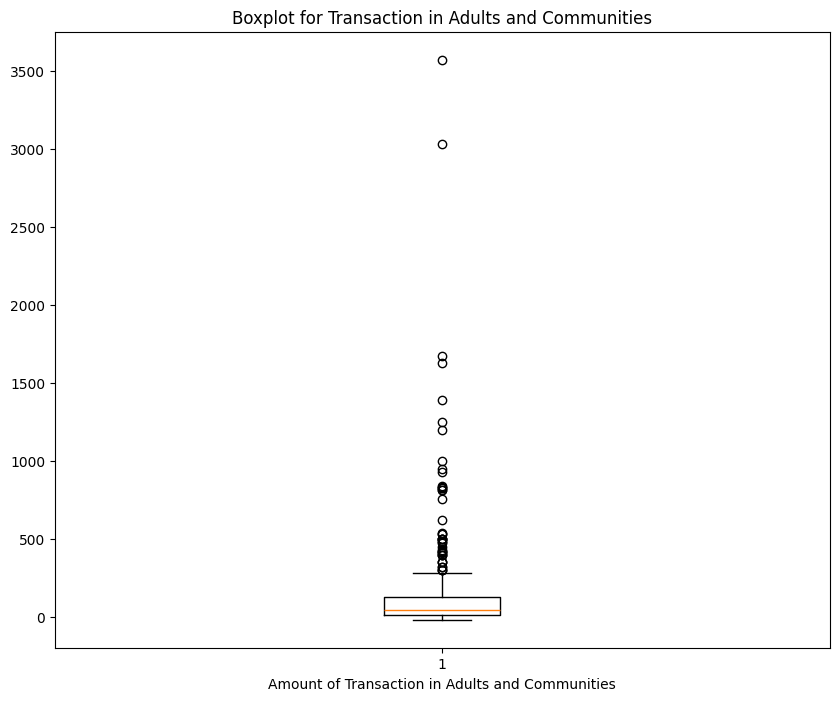

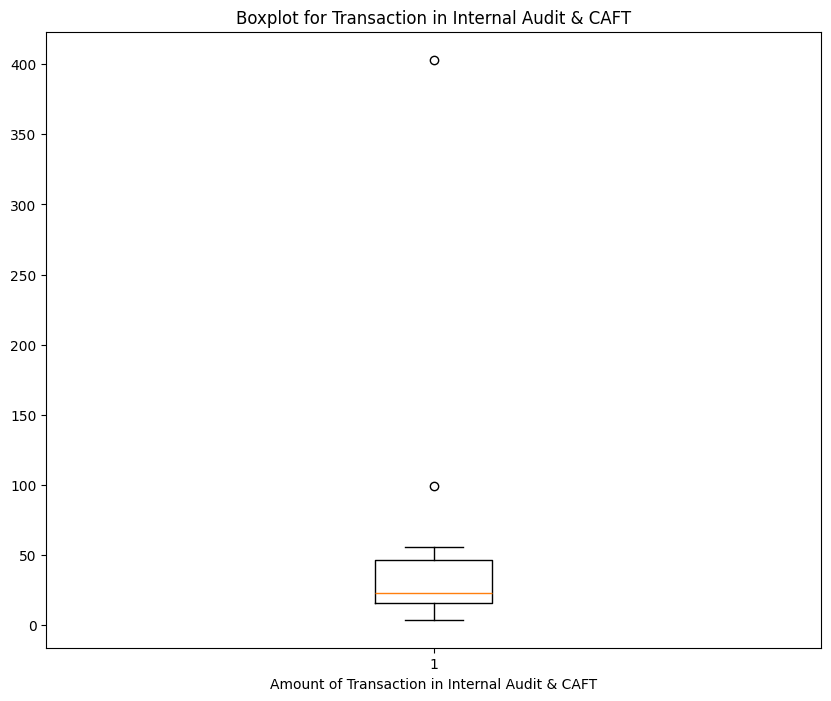

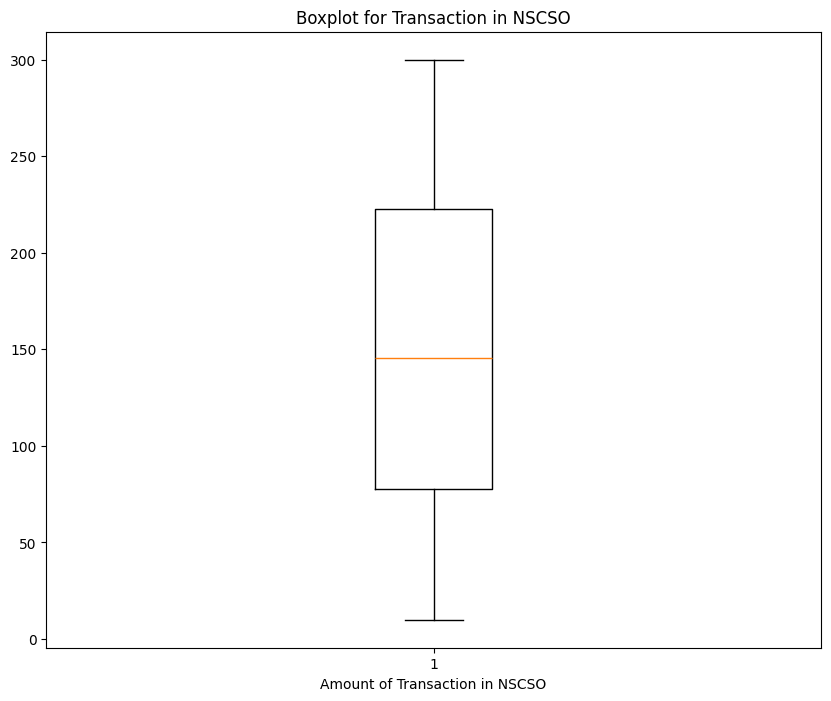

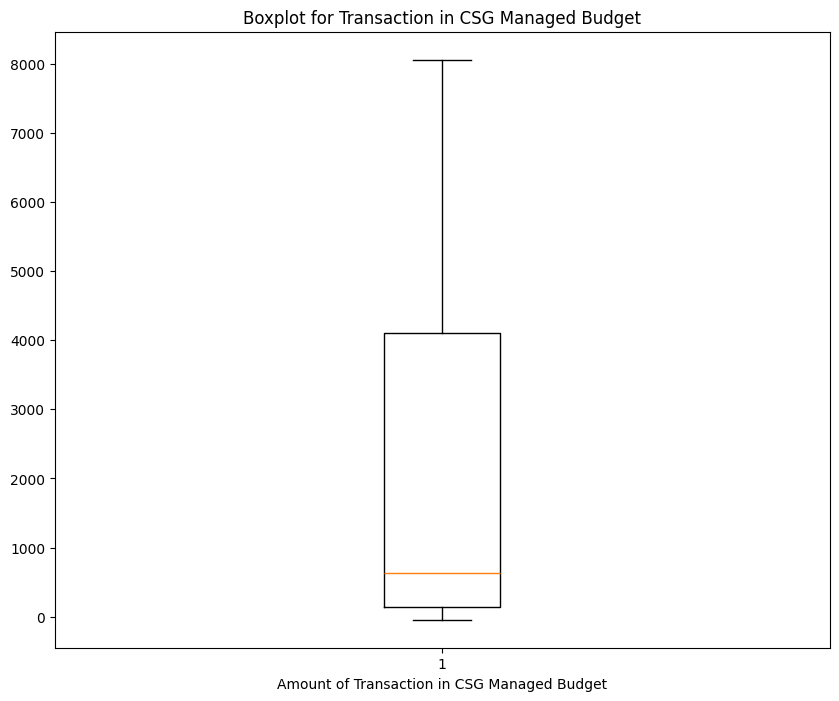

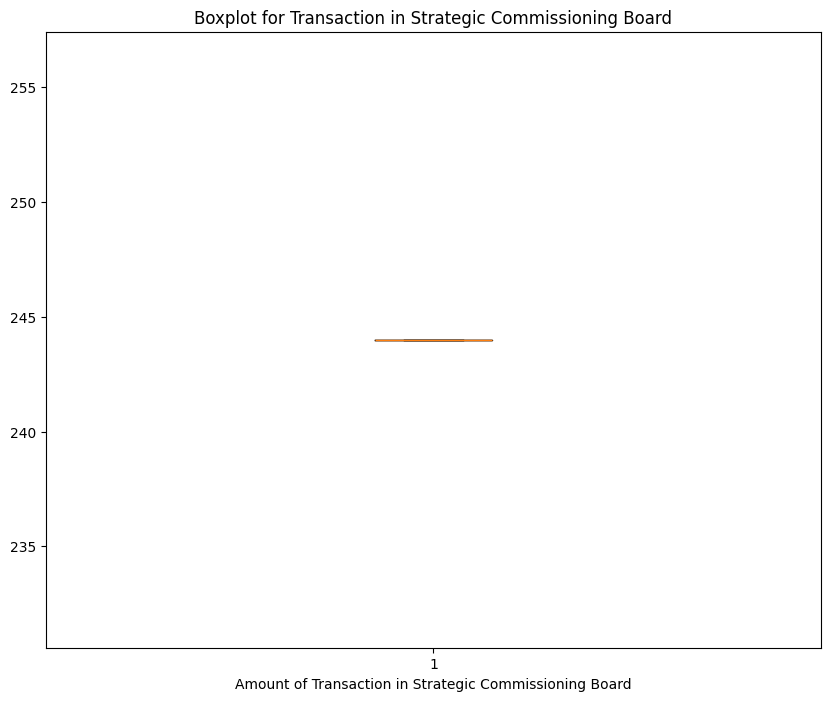

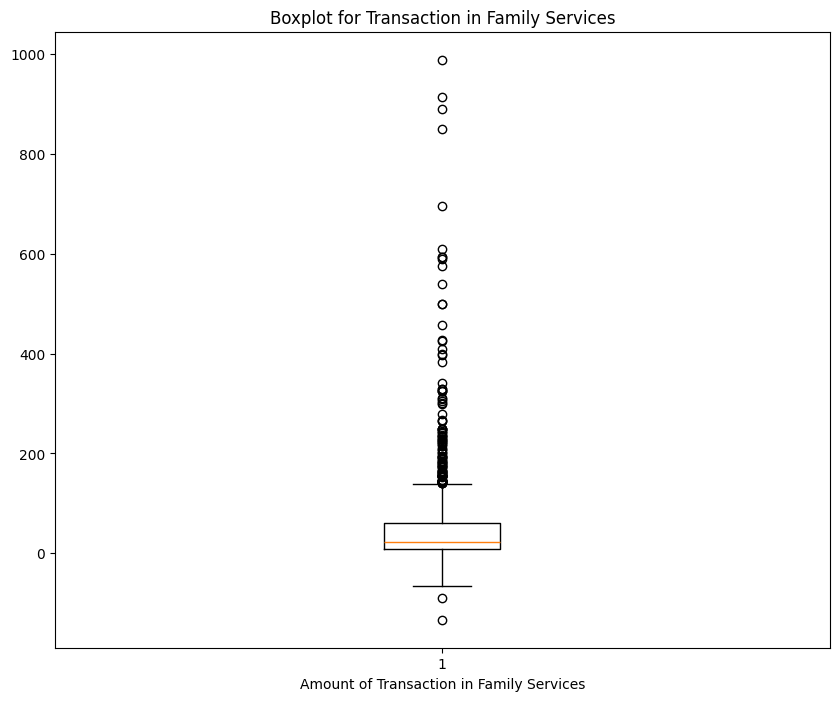

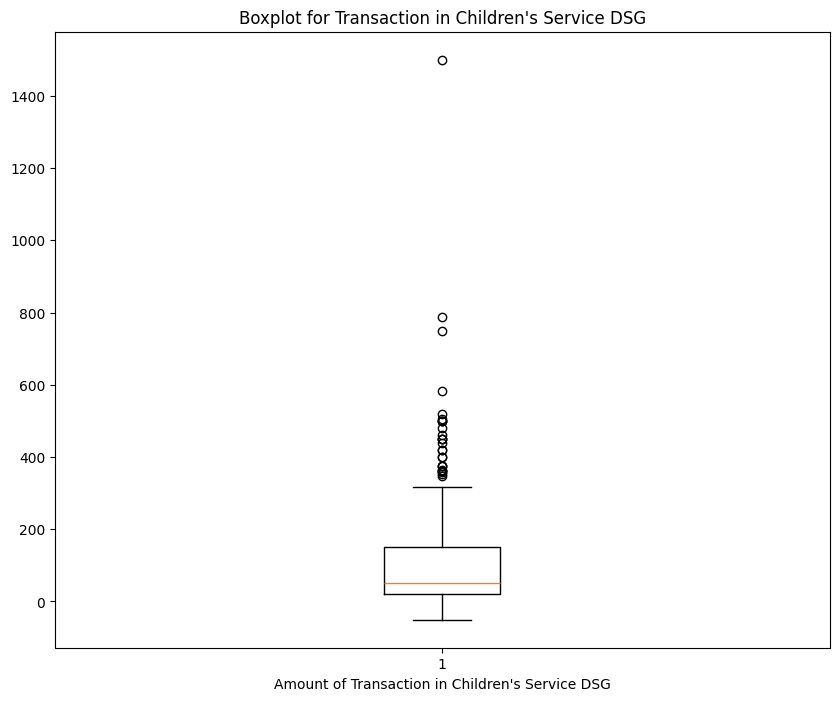

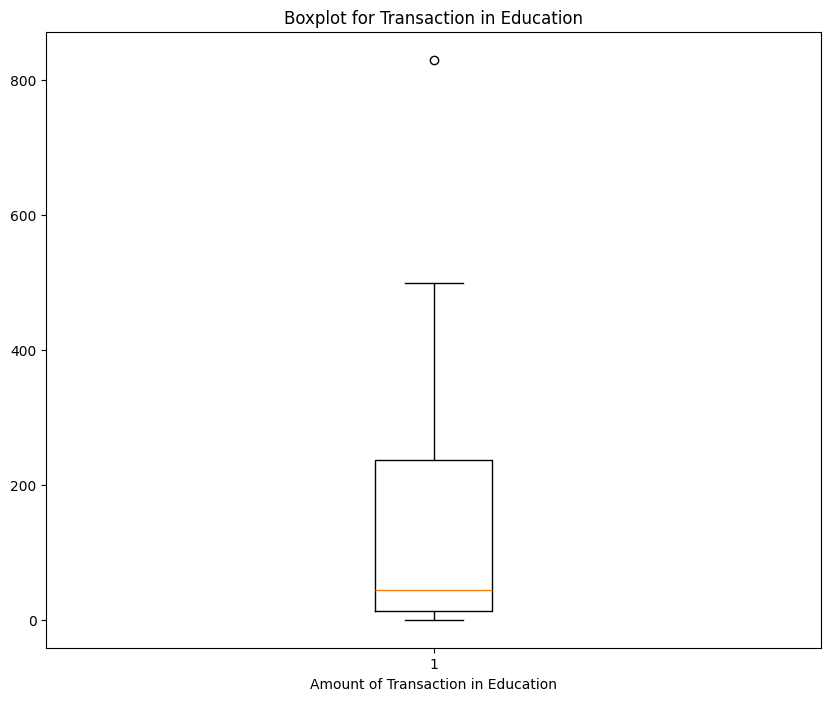

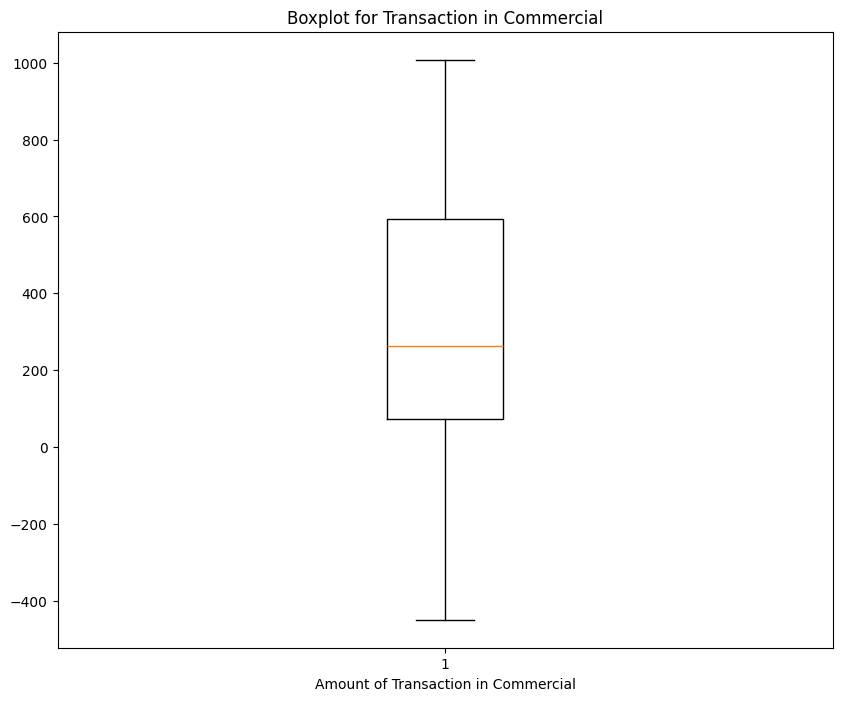

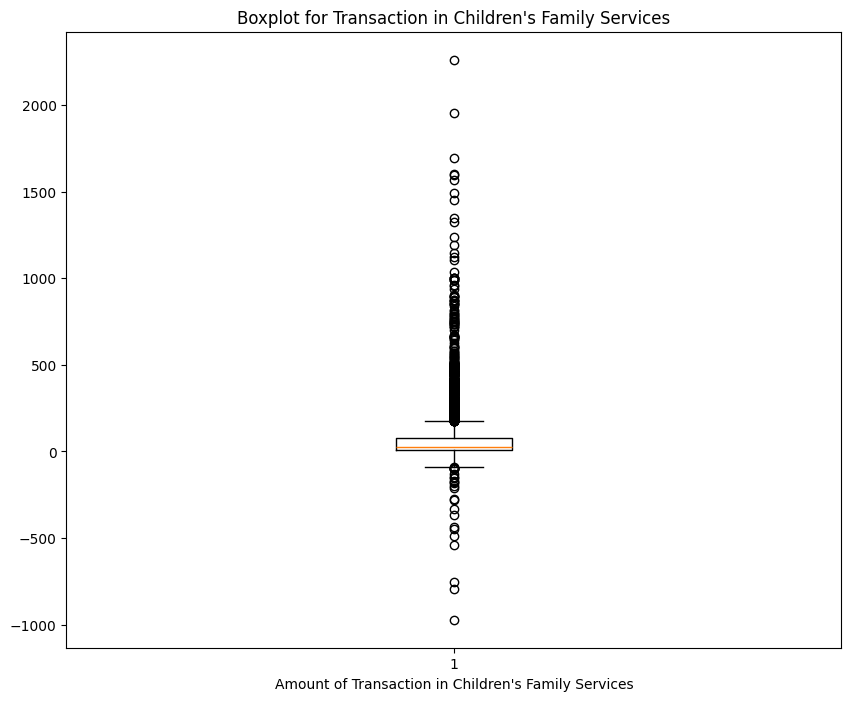

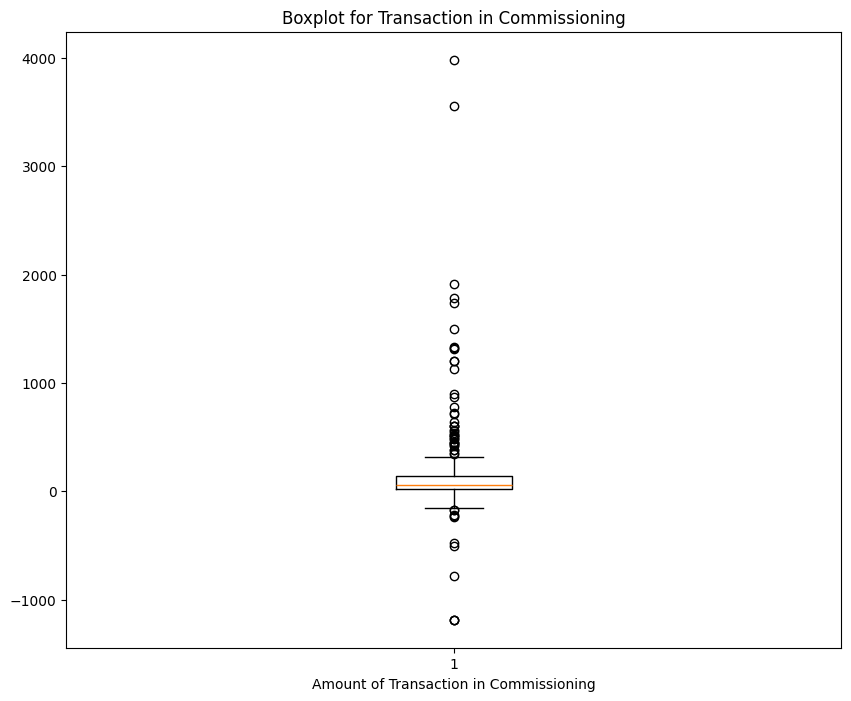

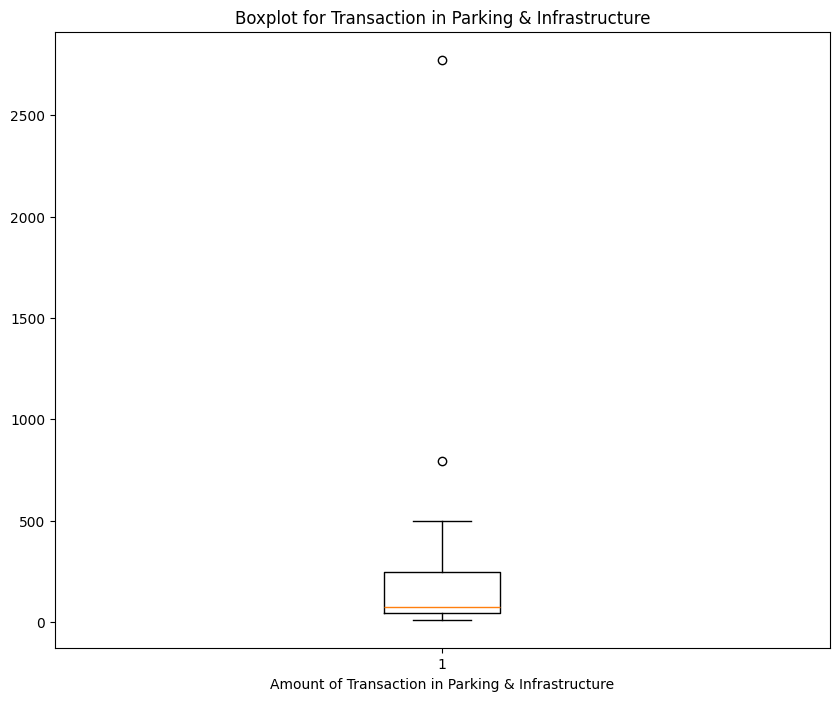

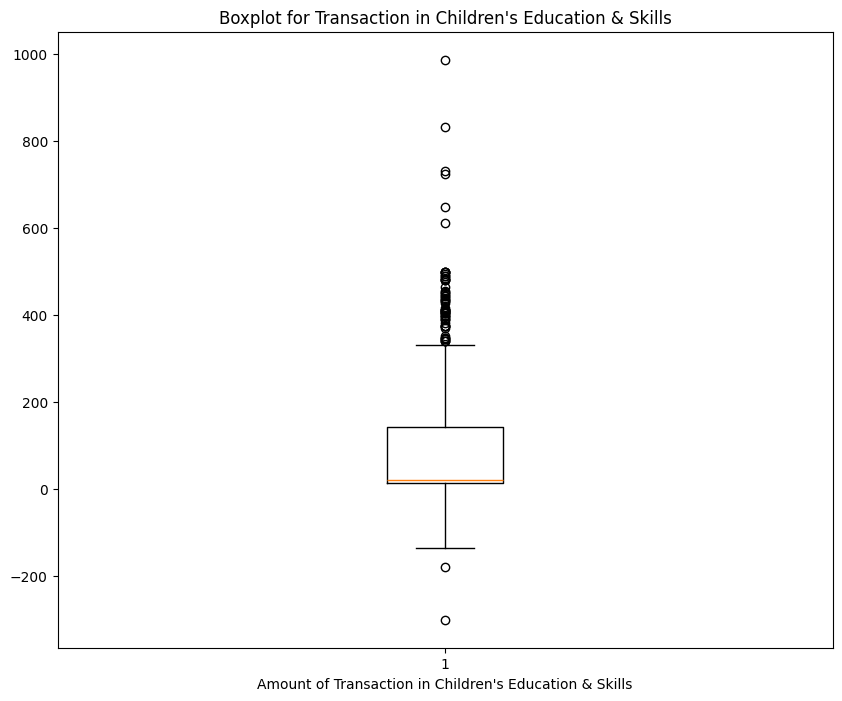

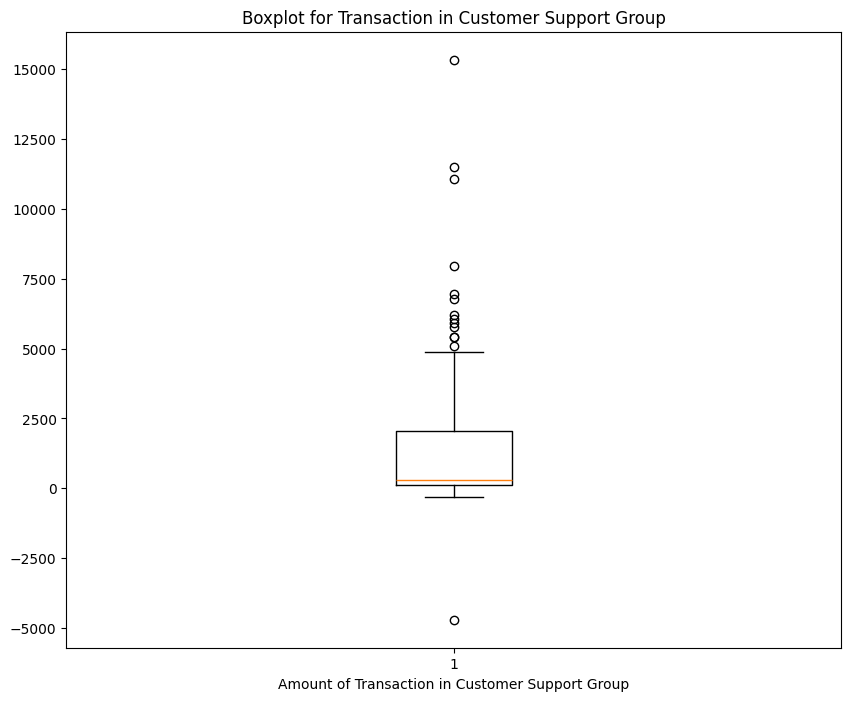

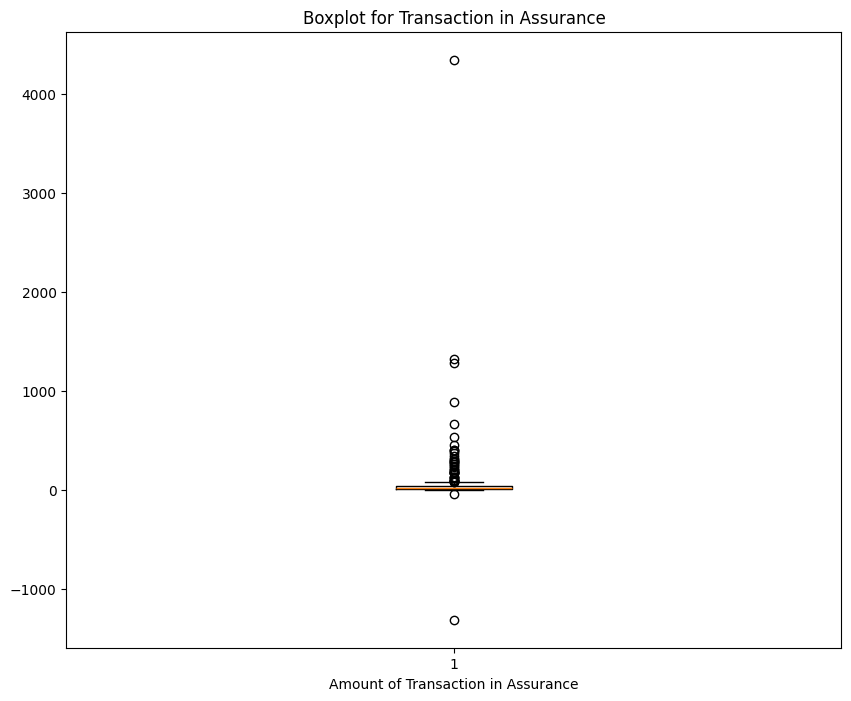

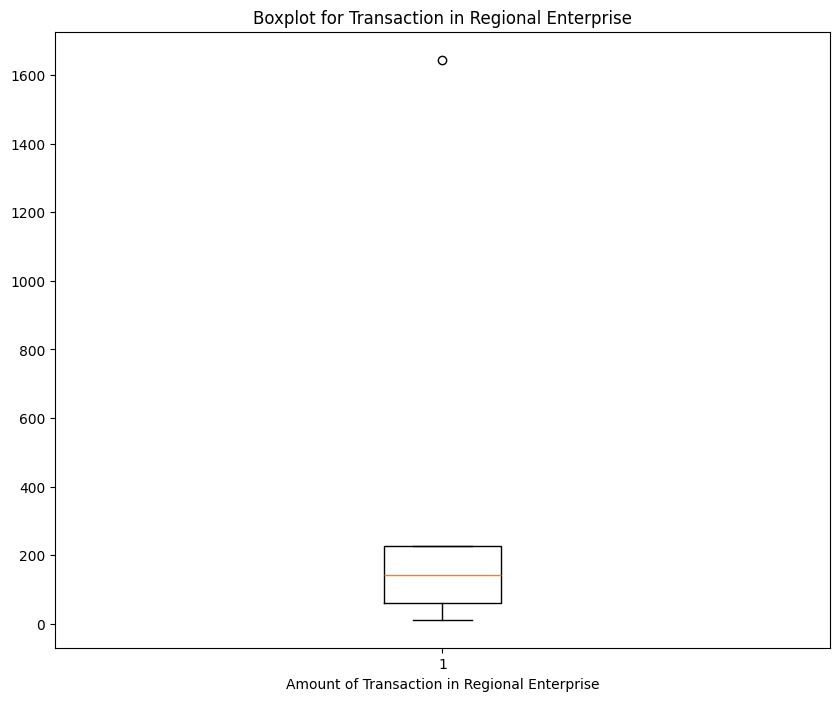

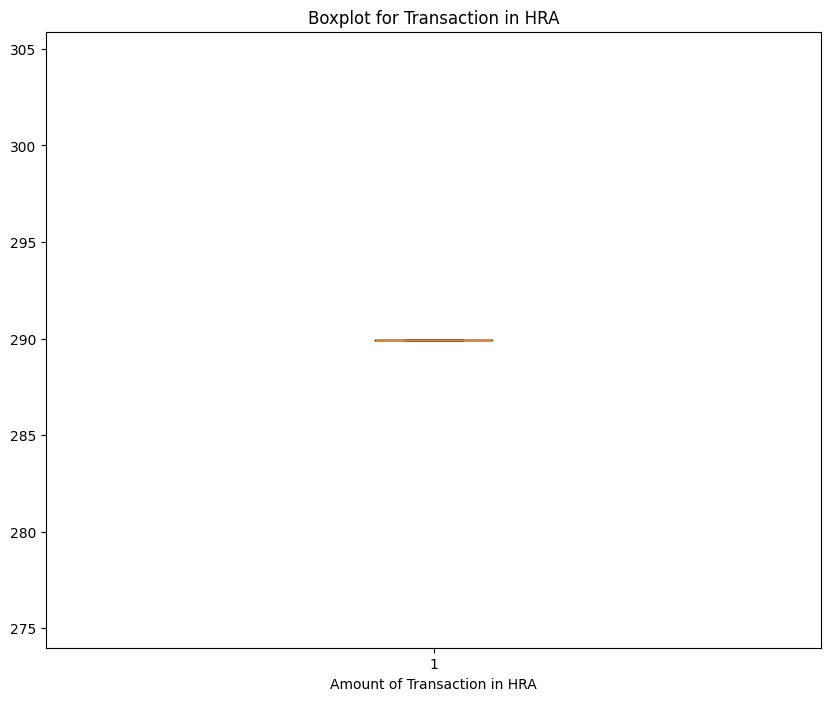

In [760]:
for area in cct_14_16['Service Area'].unique():
    plt.figure(figsize= (10,8))
    plt.boxplot(cct_14_16[cct_14_16['Service Area']==area]['Total'])
    plt.title(f'Boxplot for Transaction in {area}')
    plt.xlabel(f'Amount of Transaction in {area}')

In [763]:
data = cct_14_16[cct_14_16['Service Area']==area]['Total']
data

0        143.81
1       6000.00
2        309.38
3        218.76
4        306.00
         ...   
2268      -8.00
2269     -32.10
2270     259.83
2271     191.96
2284      23.08
Name: Total, Length: 1297, dtype: float64

In [787]:
from scipy.stats import percentileofscore
for area in more_than_5:
    print(f'Anomalic Transaction for {area}')
    data = cct_14_16[cct_14_16['Service Area']==area]['Total']
    data = pd.DataFrame(data.reset_index(drop = True),columns = ['Total'])
    median = np.median(data)
    
    # Calculate the absolute differences from the median
    data['abs_distance'] = data['Total'] - median
    data.sort_values(by = 'abs_distance',inplace = True)
    # Calculate the percentiles of the top 5 values
    data['percentiles'] = data['abs_distance'].apply(lambda x: percentileofscore(data['Total'], x))
    print("Top 5 data points and their percentiles:")
    display(data[:5])

Anomalic Transaction for Childrens Services
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
781  -500.00       -523.08     0.000000
966  -433.91       -456.99     0.077101
257  -230.30       -253.38     0.154202
350  -157.48       -180.56     0.231303
1049  -87.00       -110.08     0.308404

Anomalic Transaction for Control Accounts
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
2   3.06        -5.075          0.0
5   3.99        -4.145          0.0
0   4.15        -3.985          0.0
4   5.28        -2.855          0.0
3  10.99         2.855          0.0

Anomalic Transaction for Street Scene
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
343 -583.12       -733.07      0.00000
55  -527.52       -677.47      0.00000
290  -78.73       -228.68      0.43573
352  -65.00       -214.95      0.43573
303  -37.57       -187.52      0.43573

Anomalic Transaction for Governance
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
7   53.94      -294.525          0.0
3   75.20      -273.265          0.0
2  160.00      -188.465          0.0
4  252.00       -96.465          0.0
6  444.93        96.465         25.0

Anomalic Transaction for Deputy Chief Operating Officer
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
105   2.15         -7.85          0.0
17    2.15         -7.85          0.0
66    2.25         -7.75          0.0
64    2.40         -7.60          0.0
76    2.40         -7.60          0.0

Anomalic Transaction for Public Health
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
1 -13.30        -17.85     0.000000
2   4.55          0.00    33.333333
0  10.95          6.40    66.666667

Anomalic Transaction for Adults and Communities
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
58  -16.22       -64.195          0.0
204 -15.97       -63.945          0.0
232   2.00       -45.975          0.0
192   2.70       -45.275          0.0
199   3.29       -44.685          0.0

Anomalic Transaction for Internal Audit & CAFT
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
0    4.0         -19.4          0.0
7   11.4         -12.0          0.0
5   15.0          -8.4          0.0
8   17.0          -6.4          0.0
9   20.0          -3.4          0.0

Anomalic Transaction for NSCSO
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
0   10.0        -135.5     0.000000
1  145.5           0.0     0.000000
2  300.0         154.5    66.666667

Anomalic Transaction for CSG Managed Budget
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
16 -44.99       -675.89          0.0
4    4.86       -626.04          0.0
1   13.30       -617.60          0.0
6   14.98       -615.92          0.0
2   17.98       -612.92          0.0

Anomalic Transaction for Strategic Commissioning Board
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
0  244.0           0.0          0.0

Anomalic Transaction for Family Services
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
160 -133.20       -156.60      0.00000
250  -89.00       -112.40      0.12987
41   -65.99        -89.39      0.12987
637  -50.00        -73.40      0.25974
339  -46.80        -70.20      0.25974

Anomalic Transaction for Children's Service DSG
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
99  -50.69       -101.26          0.0
114 -40.28        -90.85          0.0
203 -29.97        -80.54          0.0
94   -3.99        -54.56          0.0
95   -2.00        -52.57          0.0

Anomalic Transaction for Education
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
31    0.5         -44.0          0.0
35    1.1         -43.4          0.0
34    1.6         -42.9          0.0
75    2.7         -41.8          0.0
38    4.4         -40.1          0.0

Anomalic Transaction for Commercial
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
5 -450.00       -712.75     0.000000
1   15.00       -247.75    11.111111
8   72.00       -190.75    11.111111
7   73.95       -188.80    11.111111
0  262.75          0.00    11.111111

Anomalic Transaction for Children's Family Services
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
2639 -971.70       -996.62     0.000000
1733 -796.00       -820.92     0.013034
1266 -751.75       -776.67     0.026069
3861 -537.60       -562.52     0.039103
2425 -488.14       -513.06     0.052138

Anomalic Transaction for Commissioning
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
398 -1184.85     -1243.175         0.00
396 -1184.85     -1243.175         0.00
397 -1184.85     -1243.175         0.00
370  -780.00      -838.325         0.75
333  -500.00      -558.325         1.00

Anomalic Transaction for Parking & Infrastructure
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
5  11.78       -60.315          0.0
2  28.43       -43.665          0.0
0  41.80       -30.295          0.0
4  44.97       -27.125          0.0
1  51.02       -21.075          0.0

Anomalic Transaction for Children's Education & Skills
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
464 -301.35       -320.52     0.000000
42  -180.79       -199.96     0.149925
661 -137.10       -156.27     0.299850
662 -134.10       -153.27     0.299850
366 -112.00       -131.17     0.599700

Anomalic Transaction for Customer Support Group
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
1   -4707.0       -5007.0     0.000000
111  -300.0        -600.0     0.854701
36   -178.8        -478.8     0.854701
80   -174.0        -474.0     0.854701
82   -100.0        -400.0     0.854701

Anomalic Transaction for Assurance
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
181 -1315.20      -1326.80     0.000000
256   -49.99        -61.59     0.290698
175    -3.50        -15.10     0.581395
83      0.37        -11.23     0.581395
68      0.84        -10.76     0.581395

Anomalic Transaction for Regional Enterprise
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
5   12.0        -131.0          0.0
0   60.0         -83.0          0.0
2   60.0         -83.0          0.0
3  226.0          83.0         50.0
4  226.0          83.0         50.0

Anomalic Transaction for HRA
Top 5 data points and their percentiles:


Total  abs_distance  percentiles
0  289.94           0.0          0.0